In [413]:
import pandas as pd
import numpy as np
#visuals
import matplotlib.pyplot as plt
import seaborn as sns
#db
import psycopg2 as psy
#for decoding the IP's location
import geoip2.database


In [414]:
Feb6 = pd.read_csv('/Users/sa12/Documents/Repositories/The-CyberChase/CybercrimeData/2023-02-06.csv')

In [415]:
Feb6.describe()

Src Port       Dst Port       Protocol  Flow Duration  \
count  162278.000000  162278.000000  162278.000000   1.622780e+05   
mean    32833.672981     431.671736      16.648061   5.192189e+07   
std     19016.502996    3684.013130       1.935844   3.609918e+07   
min         0.000000      19.000000       6.000000   0.000000e+00   
25%     16320.000000     123.000000      17.000000   2.145707e+07   
50%     33130.500000     123.000000      17.000000   4.817127e+07   
75%     49301.000000     123.000000      17.000000   8.283794e+07   
max     65534.000000   64296.000000      17.000000   1.199999e+08   

       Total Fwd Packet  Total Bwd packets  Total Length of Fwd Packet  \
count     162278.000000      162278.000000               162278.000000   
mean          72.135354           0.395525                  598.314633   
std          428.722006          11.629813                 4197.190717   
min            1.000000           0.000000                    0.000000   
25%            2.000000           0.000000                   16.000000   
50%            2.000000           0.000000                   16.000000   
75%            2.000000           0.000000                   16.000000   
max        17457.000000        4560.000000               619427.000000   

       Total Length of Bwd Packet  Fwd Packet Length Max  \
count                1.622780e+05          162278.000000   
mean                 1.532645e+02              15.469768   
std                  1.623823e+04              68.930309   
min                  0.000000e+00               0.000000   
25%                  0.000000e+00               8.000000   
50%                  0.000000e+00               8.000000   
75%                  0.000000e+00               8.000000   
max                  6.467851e+06            1448.000000   

       Fwd Packet Length Min  ...  Fwd Act Data Pkts  Fwd Seg Size Min  \
count          162278.000000  ...      162278.000000     162278.000000   
mean                9.568882  ...          71.078168          8.631065   
std                16.063857  ...         428.729481          3.623402   
min                 0.000000  ...           0.000000          8.000000   
25%                 8.000000  ...           1.000000          8.000000   
50%                 8.000000  ...           1.000000          8.000000   
75%                 8.000000  ...           1.000000          8.000000   
max              1336.000000  ...       17456.000000         52.000000   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  1.622780e+05  1.622780e+05  1.622780e+05  1.622780e+05  1.622780e+05   
mean   1.409520e+04  8.372814e+01  1.416324e+04  1.403855e+04  9.656473e+14   
std    2.742538e+05  1.650773e+04  2.753055e+05  2.737491e+05  3.203097e+14   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.196894e+14   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  8.378591e+14   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  8.378612e+14   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  8.378633e+14   
max    4.075610e+07  5.395407e+06  4.075610e+07  4.075610e+07  1.675728e+15   

           Idle Std      Idle Max      Idle Min  
count  1.622780e+05  1.622780e+05  1.622780e+05  
mean   9.810193e+14  1.675717e+15  2.766874e+14  
std    4.383001e+14  1.498794e+10  6.221657e+14  
min    0.000000e+00  1.675642e+15  5.000336e+06  
25%    1.184909e+15  1.675716e+15  3.336530e+07  
50%    1.184913e+15  1.675721e+15  6.706448e+07  
75%    1.184916e+15  1.675724e+15  1.056456e+08  
max    1.184919e+15  1.675728e+15  1.675728e+15  

[8 rows x 79 columns]

<Axes: xlabel='Value', ylabel='Feature'>

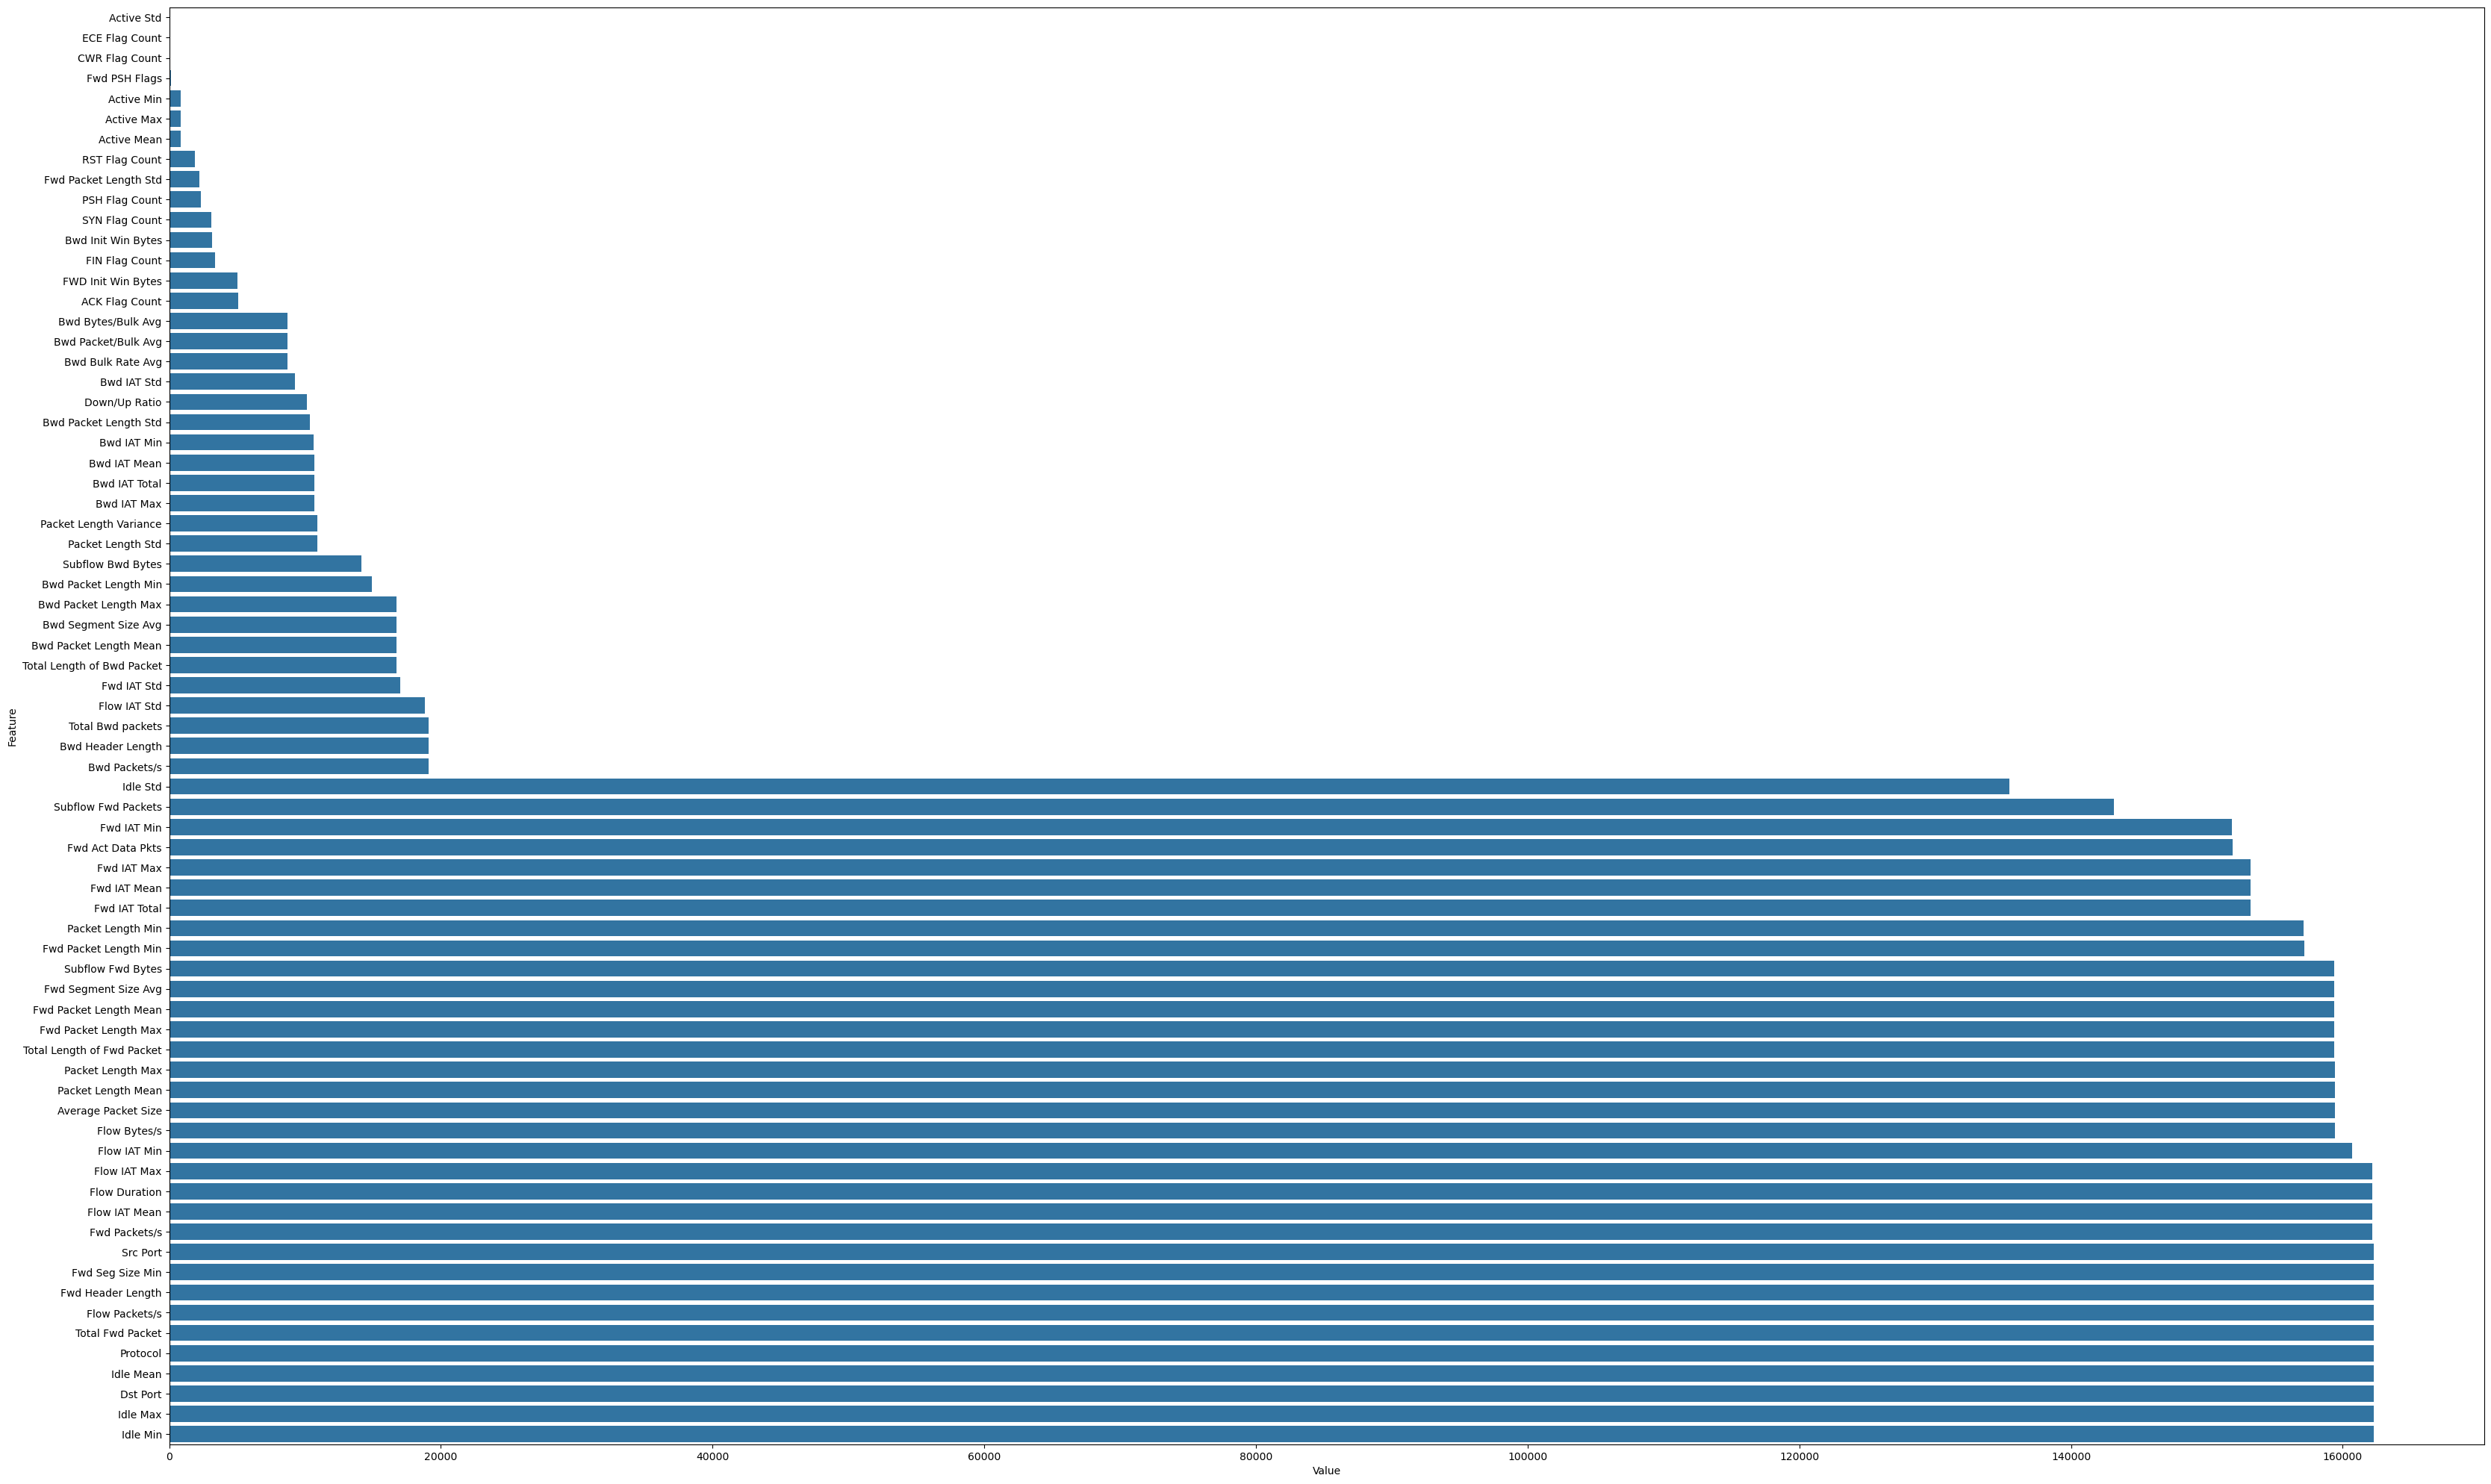

In [416]:
greater_than_zero_counts = {}
total_rows = len(Feb6)
for column in Feb6.columns:
    # Check if the column is numeric to avoid errors
    if pd.api.types.is_numeric_dtype(Feb6[column]):
        count = (Feb6[column] > 0).sum()
        greater_than_zero_counts[column] = count
greater_than_zero_counts = pd.DataFrame(greater_than_zero_counts.items(), columns=['Feature', 'Value'])
zero_counts = greater_than_zero_counts[greater_than_zero_counts['Value'] < 0]
greater_than_zero_counts = greater_than_zero_counts[greater_than_zero_counts['Value'] > 0].sort_values(by='Value')
plt.figure(figsize=(40,25))
sns.barplot(greater_than_zero_counts, y='Feature', x='Value')

In [417]:
zero_counts

Empty DataFrame
Columns: [Feature, Value]
Index: []

In [418]:
drop_cols = zero_counts['Feature'].to_list()
Feb6 = Feb6.drop(columns=drop_cols)
Feb6

Flow ID          Src IP  Src Port  \
0         61.177.172.145-10.1.0.4-37881-22-6  61.177.172.145     37881   
1         61.177.172.145-10.1.0.4-37881-22-6  61.177.172.145     37881   
2         91.195.240.12-10.1.0.4-5960-123-17   91.195.240.12      5960   
3         91.195.240.12-10.1.0.4-4689-123-17   91.195.240.12      4689   
4         91.195.240.12-10.1.0.4-3683-123-17   91.195.240.12      3683   
...                                      ...             ...       ...   
162273   95.162.223.26-10.1.0.4-50900-123-17   95.162.223.26     50900   
162274   95.162.223.26-10.1.0.4-59861-123-17   95.162.223.26     59861   
162275   95.162.210.103-10.1.0.4-1492-123-17  95.162.210.103      1492   
162276  95.162.215.209-10.1.0.4-64689-123-17  95.162.215.209     64689   
162277  95.162.215.209-10.1.0.4-63337-123-17  95.162.215.209     63337   

          Dst IP  Dst Port  Protocol            Timestamp  Flow Duration  \
0       10.1.0.4        22         6  2023-02-06 00:00:15         582135   
1       10.1.0.4        22         6  2023-02-06 00:00:17            395   
2       10.1.0.4       123        17  2023-02-06 00:00:48       30007782   
3       10.1.0.4       123        17  2023-02-06 00:00:48       29992657   
4       10.1.0.4       123        17  2023-02-06 00:00:48       30013940   
...          ...       ...       ...                  ...            ...   
162273  10.1.0.4       123        17  2023-02-06 23:59:59       28213032   
162274  10.1.0.4       123        17  2023-02-06 23:59:59       80298510   
162275  10.1.0.4       123        17  2023-02-06 23:59:59       62600014   
162276  10.1.0.4       123        17  2023-02-06 23:59:59      114660707   
162277  10.1.0.4       123        17  2023-02-06 23:59:59      119260278   

        Total Fwd Packet  Total Bwd packets  ...  Fwd Seg Size Min  \
0                      3                  4  ...                32   
1                      3                  0  ...                32   
2                    557                  4  ...                 8   
3                    591                  4  ...                 8   
4                    615                  4  ...                 8   
...                  ...                ...  ...               ...   
162273                 2                  0  ...                 8   
162274                 2                  0  ...                 8   
162275                 2                  0  ...                 8   
162276                 2                  0  ...                 8   
162277                 3                  0  ...                 8   

        Active Mean  Active Std  Active Max  Active Min     Idle Mean  \
0               0.0         0.0         0.0         0.0  1.675642e+15   
1               0.0         0.0         0.0         0.0  1.675642e+15   
2               0.0         0.0         0.0         0.0  1.675642e+15   
3               0.0         0.0         0.0         0.0  1.675642e+15   
4               0.0         0.0         0.0         0.0  1.675642e+15   
...             ...         ...         ...         ...           ...   
162273          0.0         0.0         0.0         0.0  8.378640e+14   
162274          0.0         0.0         0.0         0.0  8.378640e+14   
162275          0.0         0.0         0.0         0.0  8.378640e+14   
162276          0.0         0.0         0.0         0.0  8.378641e+14   
162277          0.0         0.0         0.0         0.0  5.585760e+14   

            Idle Std      Idle Max      Idle Min    Label  
0       0.000000e+00  1.675642e+15  1.675642e+15   cowrie  
1       0.000000e+00  1.675642e+15  1.675642e+15   cowrie  
2       0.000000e+00  1.675642e+15  1.675642e+15  ddospot  
3       0.000000e+00  1.675642e+15  1.675642e+15  ddospot  
4       0.000000e+00  1.675642e+15  1.675642e+15  ddospot  
...              ...           ...           ...      ...  
162273  1.184919e+15  1.675728e+15  2.821303e+07  ddospot  
162274  1.184919e+15  1.675728e+15  8

In [419]:
Feb6.groupby('Label')['Protocol'].value_counts()

Label       Protocol
adbhoney    6              354
            17               3
ciscoasa    6              260
            17               7
cowrie      6             3198
            17               9
ddospot     17          157067
            6                9
elasticpot  6               34
log4pot     6             1277
mailoney    6               37
redispot    6               23
Name: count, dtype: int64

The above code removes columns that were 99%+ 0's from the dataframe. They will provide us no analytical value.

# Methodology for cutting columns
### Create groupings of columns that contain data deriving from the same information:

Group 1 - flags - All columns pretaining to flags

Group 2 - Fwd - Columns pertaining to the forward flow of information. 

Group 3 - Bwd - Columns pertaining to the backward flow of information. 

Group 4 - Flow - non-directional packet and flow data.

Evaluate mega group 2-4

Group 5 - IAT - Column pertaining to the inter-arrival time (IAT). 

Group 6 - Idle/Active - Column pertaining to active vs idle time.

Group 7 - Misc - Catagorical data pertaining to time and location

### Create correlation heatmaps and identify most representitive columns:
Find columns that have around 90%+ correlation with other columns in the DF and choose to keep a single one that is MOST REPRESENTITIVE. This could mean that the column name is easiest to convoy, that one column is more robust than the other or that the column has the best average correlation across highly correlated columns.

### Drop the represented columns, create a new heatmap, & repeat
We remove the columns that we have identifyed as being represented. This let's us remove noise and rerun our correlation matrix. If there is still columns with around 90% correlation, repeat the process of identifying representitive columns and removing noise until there is no more high representation in the group. 

### Create list of all remaining columns.

<Axes: >

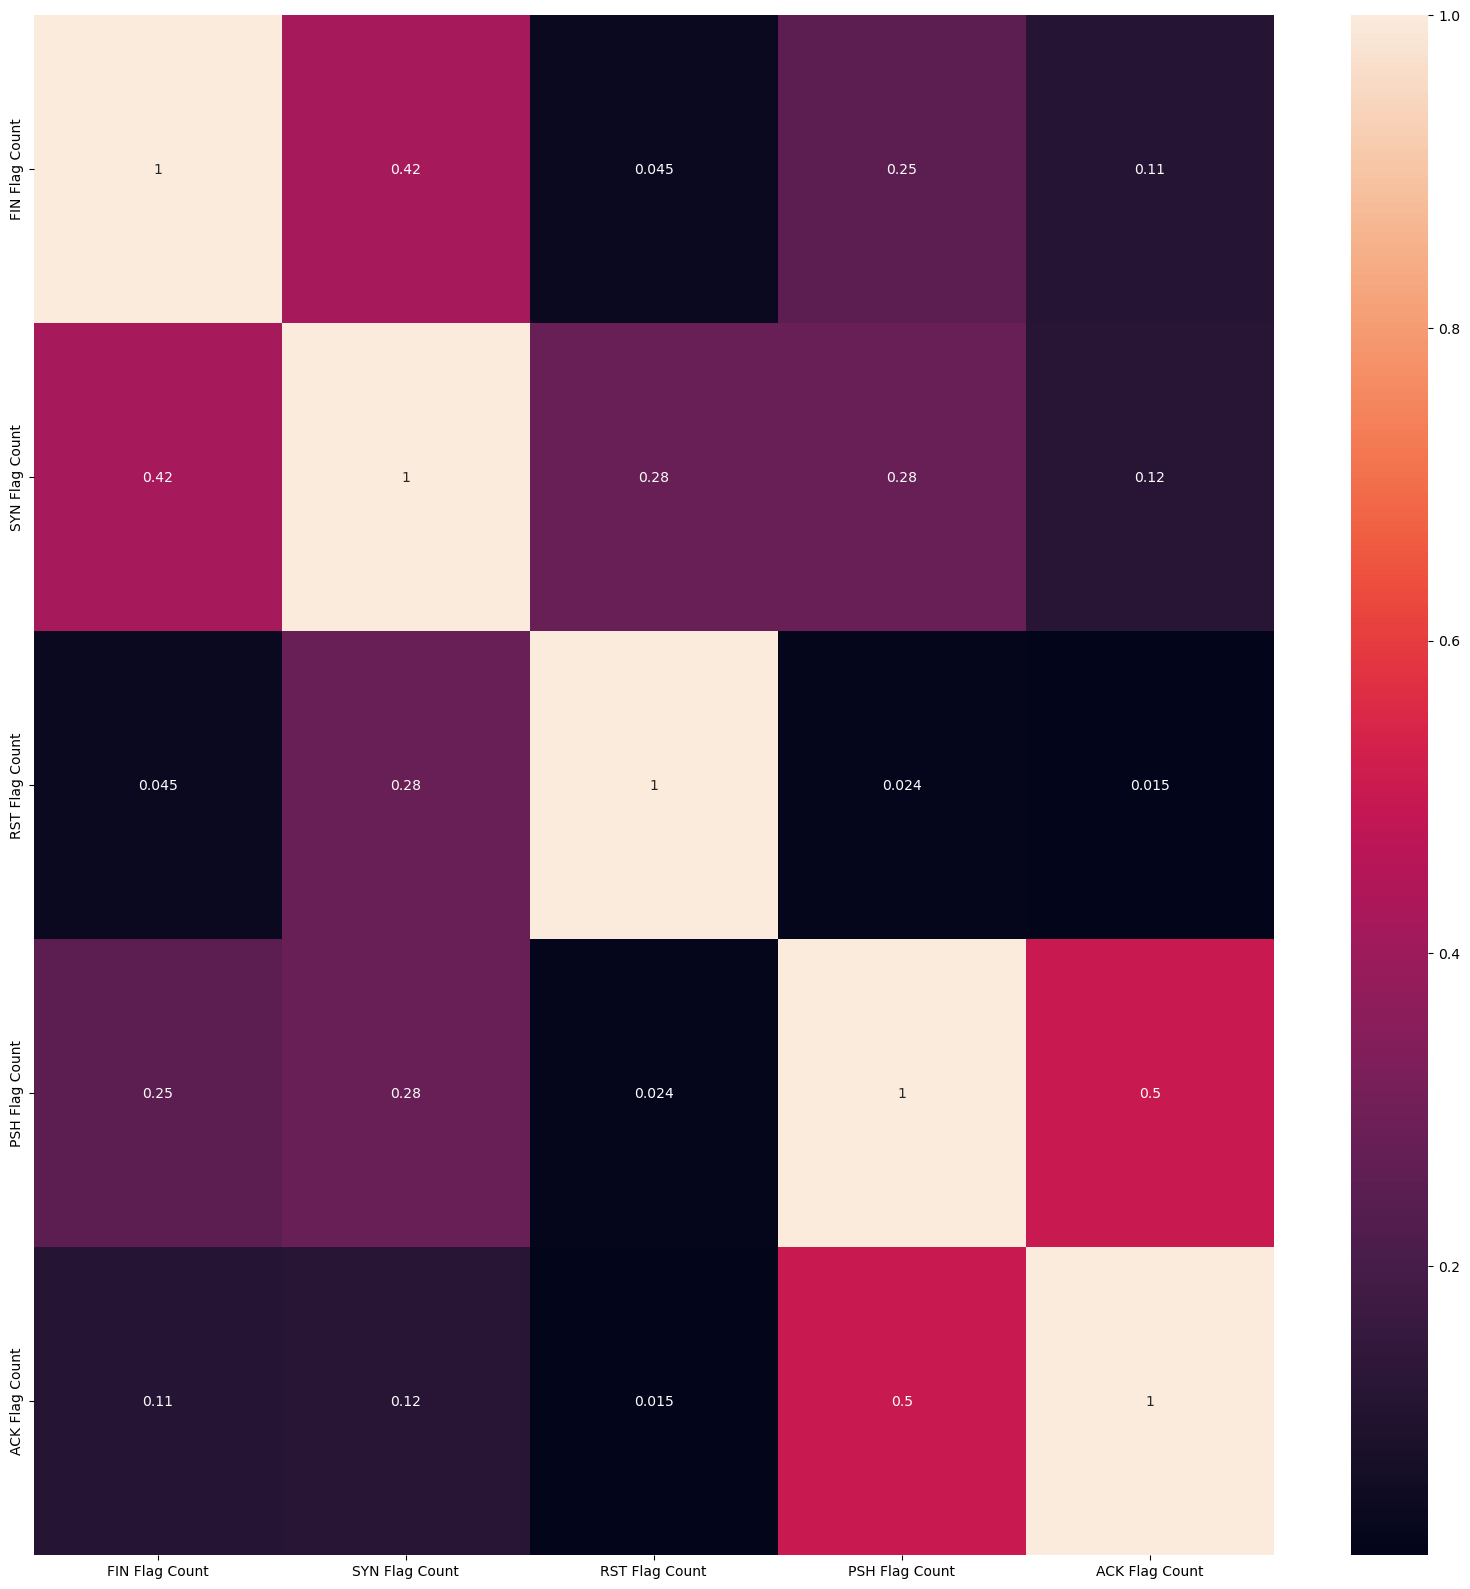

In [420]:
flags = Feb6[['FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
'ACK Flag Count']]
plt.figure(figsize=(20,20))
sns.heatmap(flags.corr(), annot=True)

In [421]:
flag_cols = flags.columns.to_list()

## Forward Flowing Data

<Axes: >

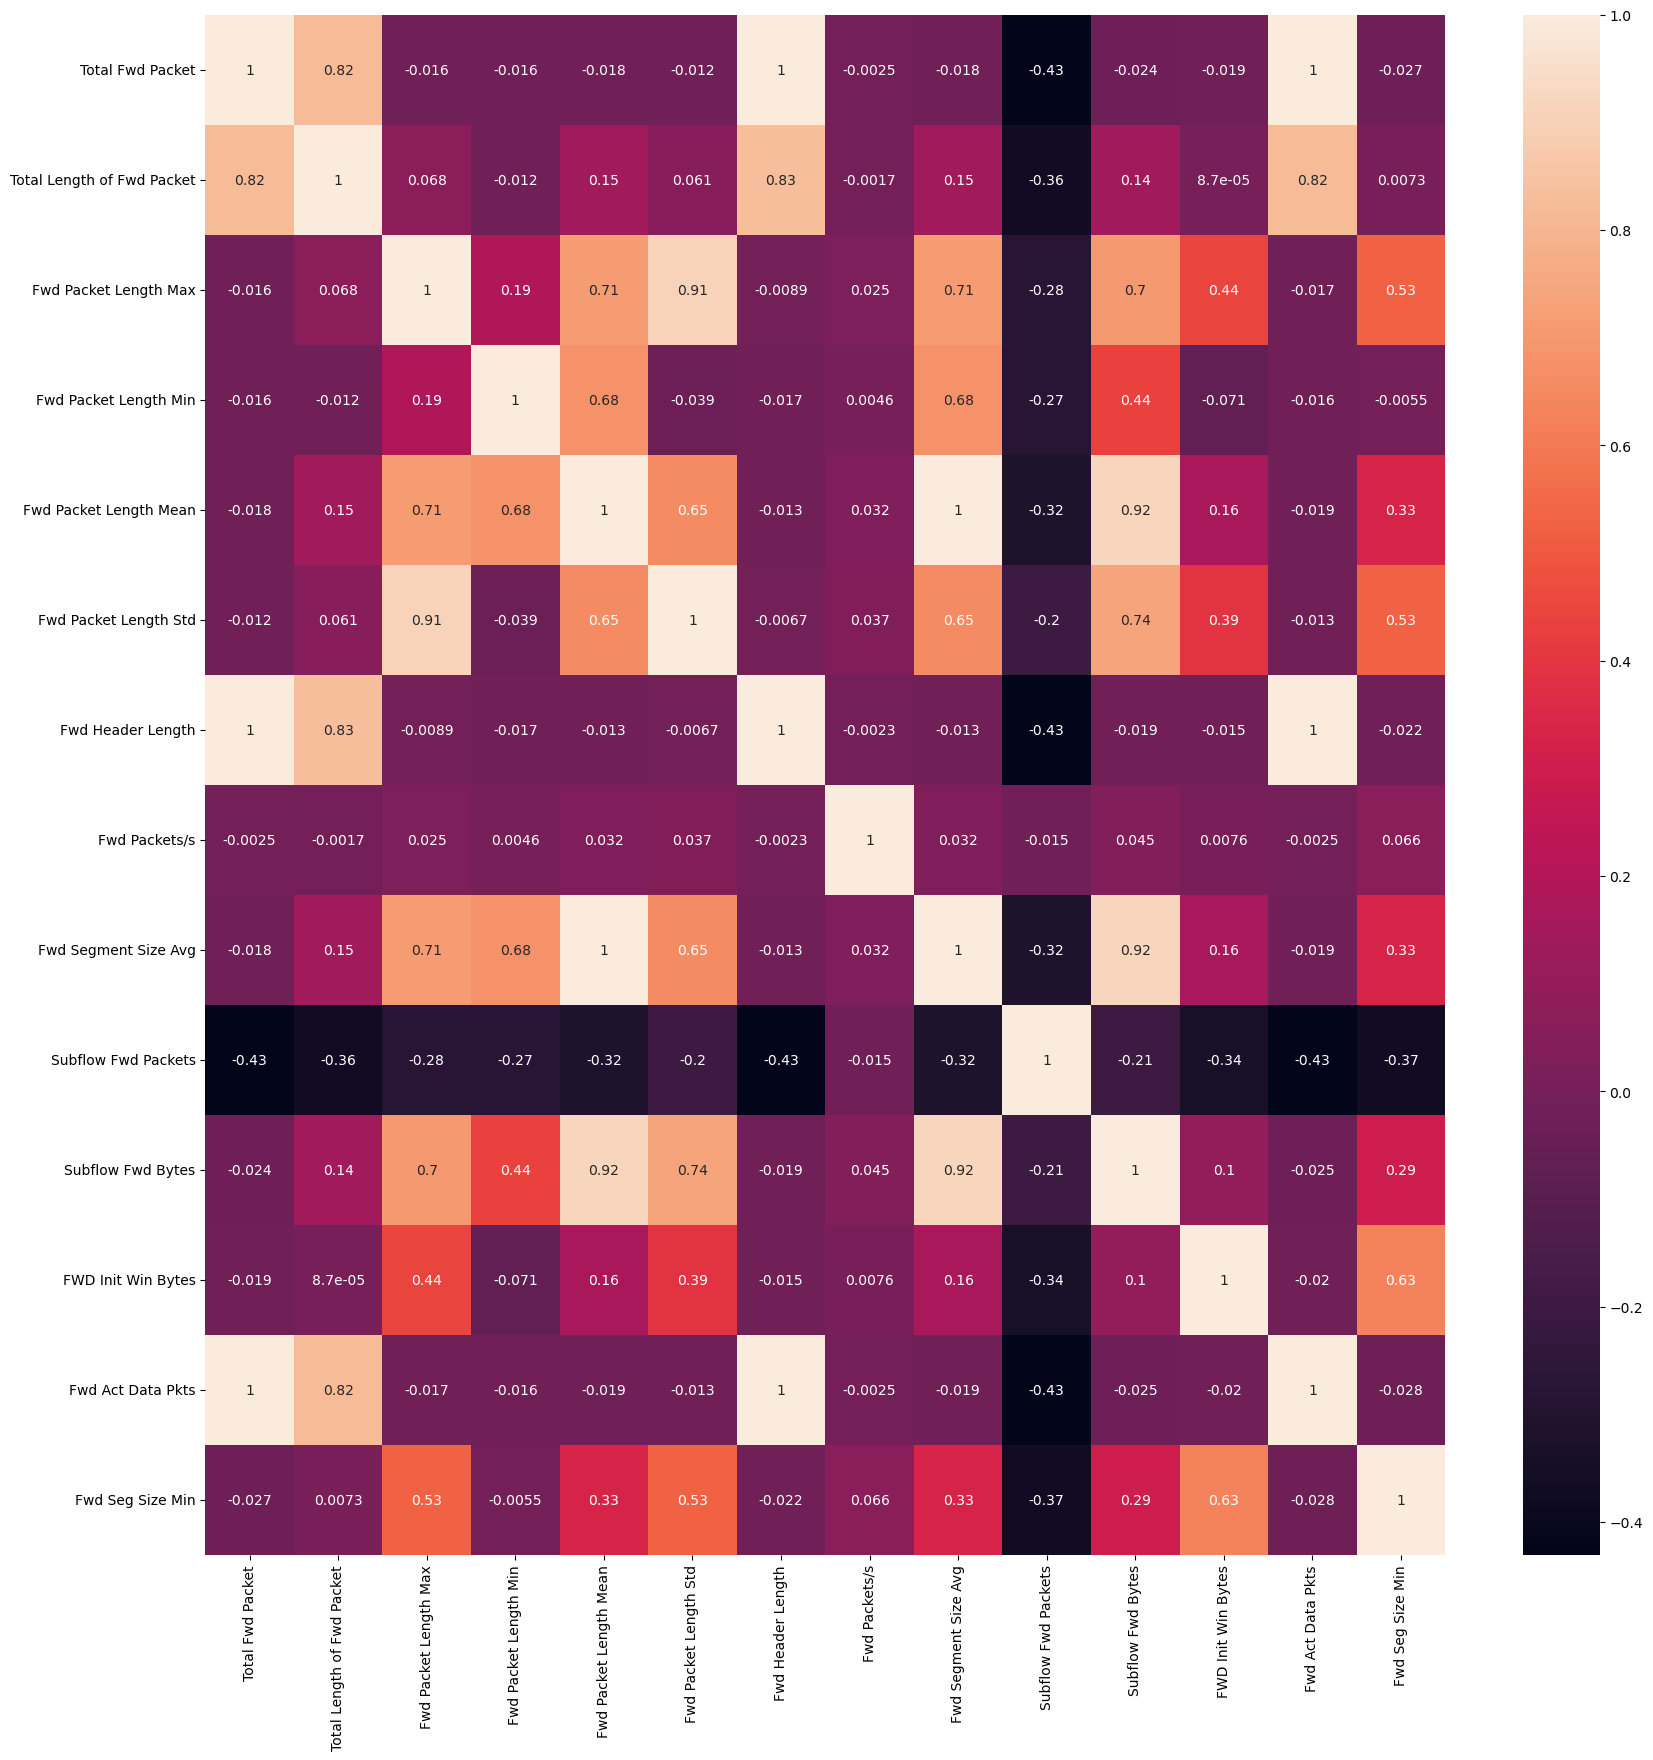

In [422]:
Feb6_Fwd = Feb6[['Total Fwd Packet',
                'Total Length of Fwd Packet',
                'Fwd Packet Length Max', 
                'Fwd Packet Length Min', 
                'Fwd Packet Length Mean', 
                'Fwd Packet Length Std',  
                'Fwd Header Length', 
                'Fwd Packets/s', 
                'Fwd Segment Size Avg', 
                'Subflow Fwd Packets', 
                'Subflow Fwd Bytes', 
                'FWD Init Win Bytes', 
                'Fwd Act Data Pkts', 
                'Fwd Seg Size Min']]
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_Fwd.corr(), annot=True)

Column to keep: 'Total Fwd Packet' - Reason: Descriptive and covers 100% of 2 columns

Resulting dropped columns: 'Total Length of Fwd Packet','Fwd Header Length', 'Fwd Act Data Pkts'

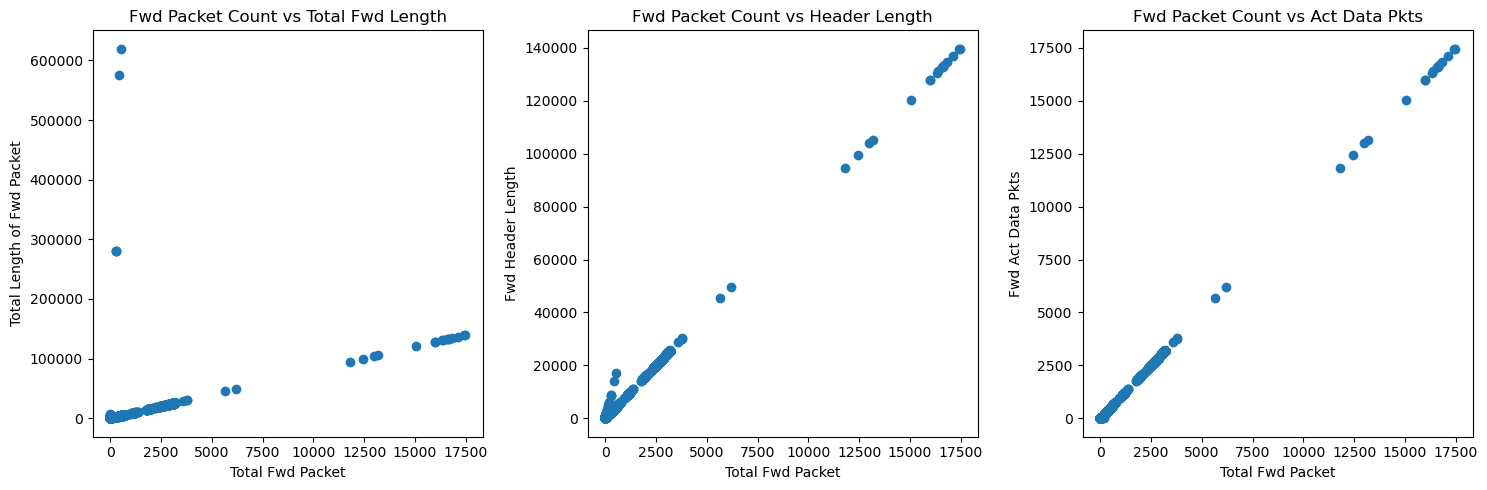

In [423]:
plt.figure(figsize=(15, 5))  # Wider to fit 3 plots side by side

# Subplot 1: Total Fwd Packet vs Total Length of Fwd Packet
plt.subplot(1, 3, 1)
plt.scatter(Feb6['Total Fwd Packet'], Feb6['Total Length of Fwd Packet'])
plt.xlabel('Total Fwd Packet')
plt.ylabel('Total Length of Fwd Packet')
plt.title('Fwd Packet Count vs Total Fwd Length')

# Subplot 2: Total Fwd Packet vs Fwd Header Length
plt.subplot(1, 3, 2)
plt.scatter(Feb6['Total Fwd Packet'], Feb6['Fwd Header Length'])
plt.xlabel('Total Fwd Packet')
plt.ylabel('Fwd Header Length')
plt.title('Fwd Packet Count vs Header Length')

# Subplot 3: Total Fwd Packet vs Fwd Act Data Pkts
plt.subplot(1, 3, 3)
plt.scatter(Feb6['Total Fwd Packet'], Feb6['Fwd Act Data Pkts'])
plt.xlabel('Total Fwd Packet')
plt.ylabel('Fwd Act Data Pkts')
plt.title('Fwd Packet Count vs Act Data Pkts')

plt.tight_layout()
plt.show()

<Axes: >

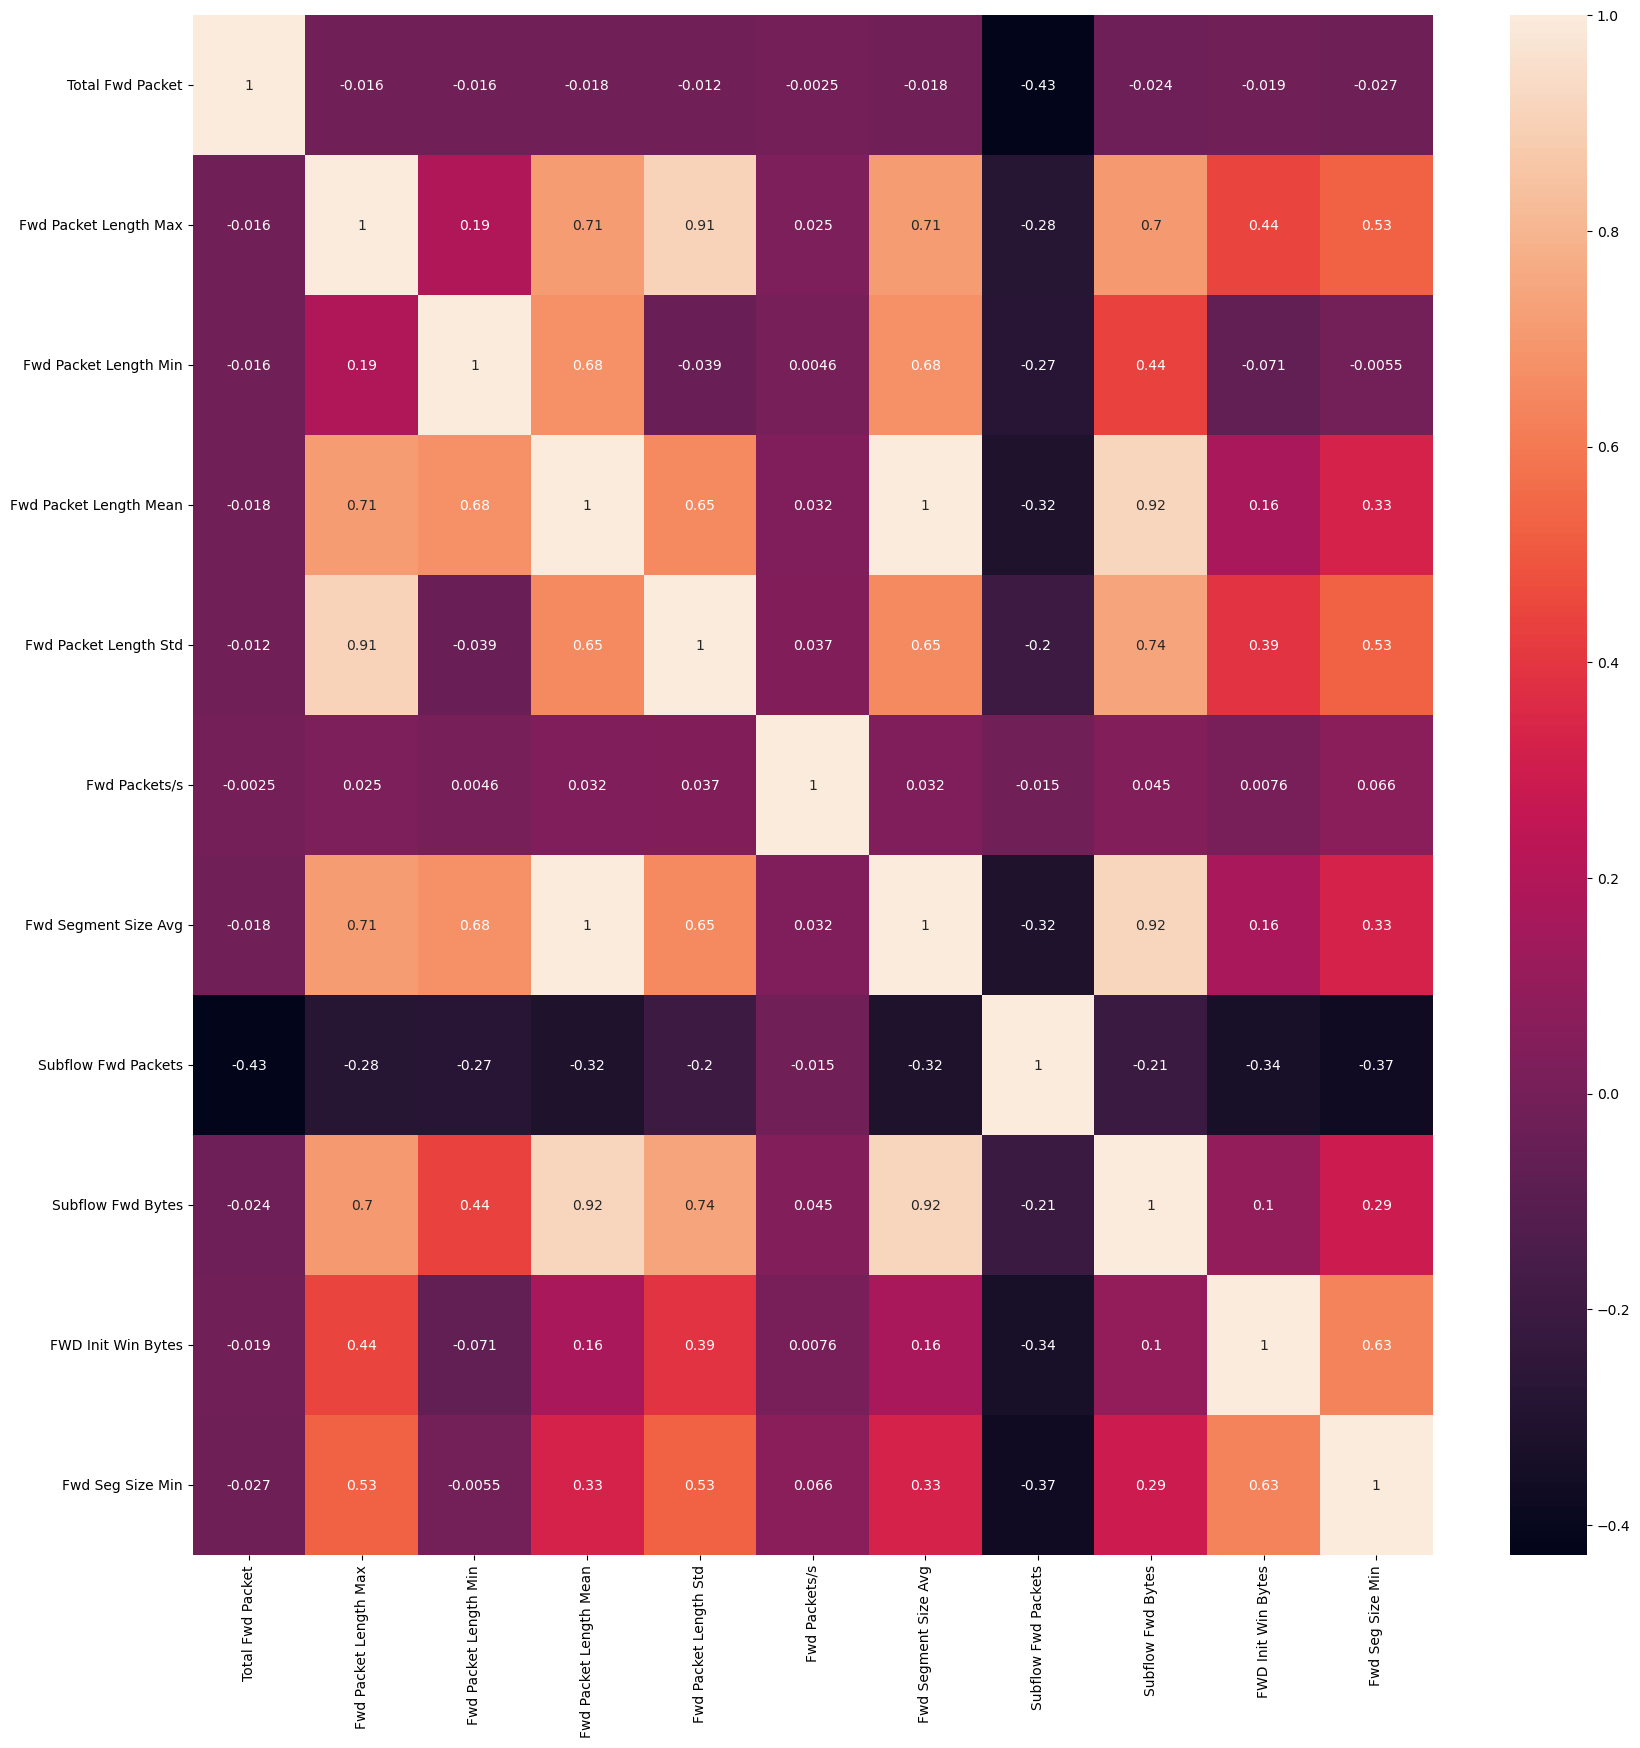

In [424]:
Feb6_Fwd = Feb6_Fwd.drop(columns=['Total Length of Fwd Packet', 'Fwd Header Length', 'Fwd Act Data Pkts'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_Fwd.corr(), annot=True)

'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Fwd Segment Size Avg', 'Subflow Fwd Bytes'

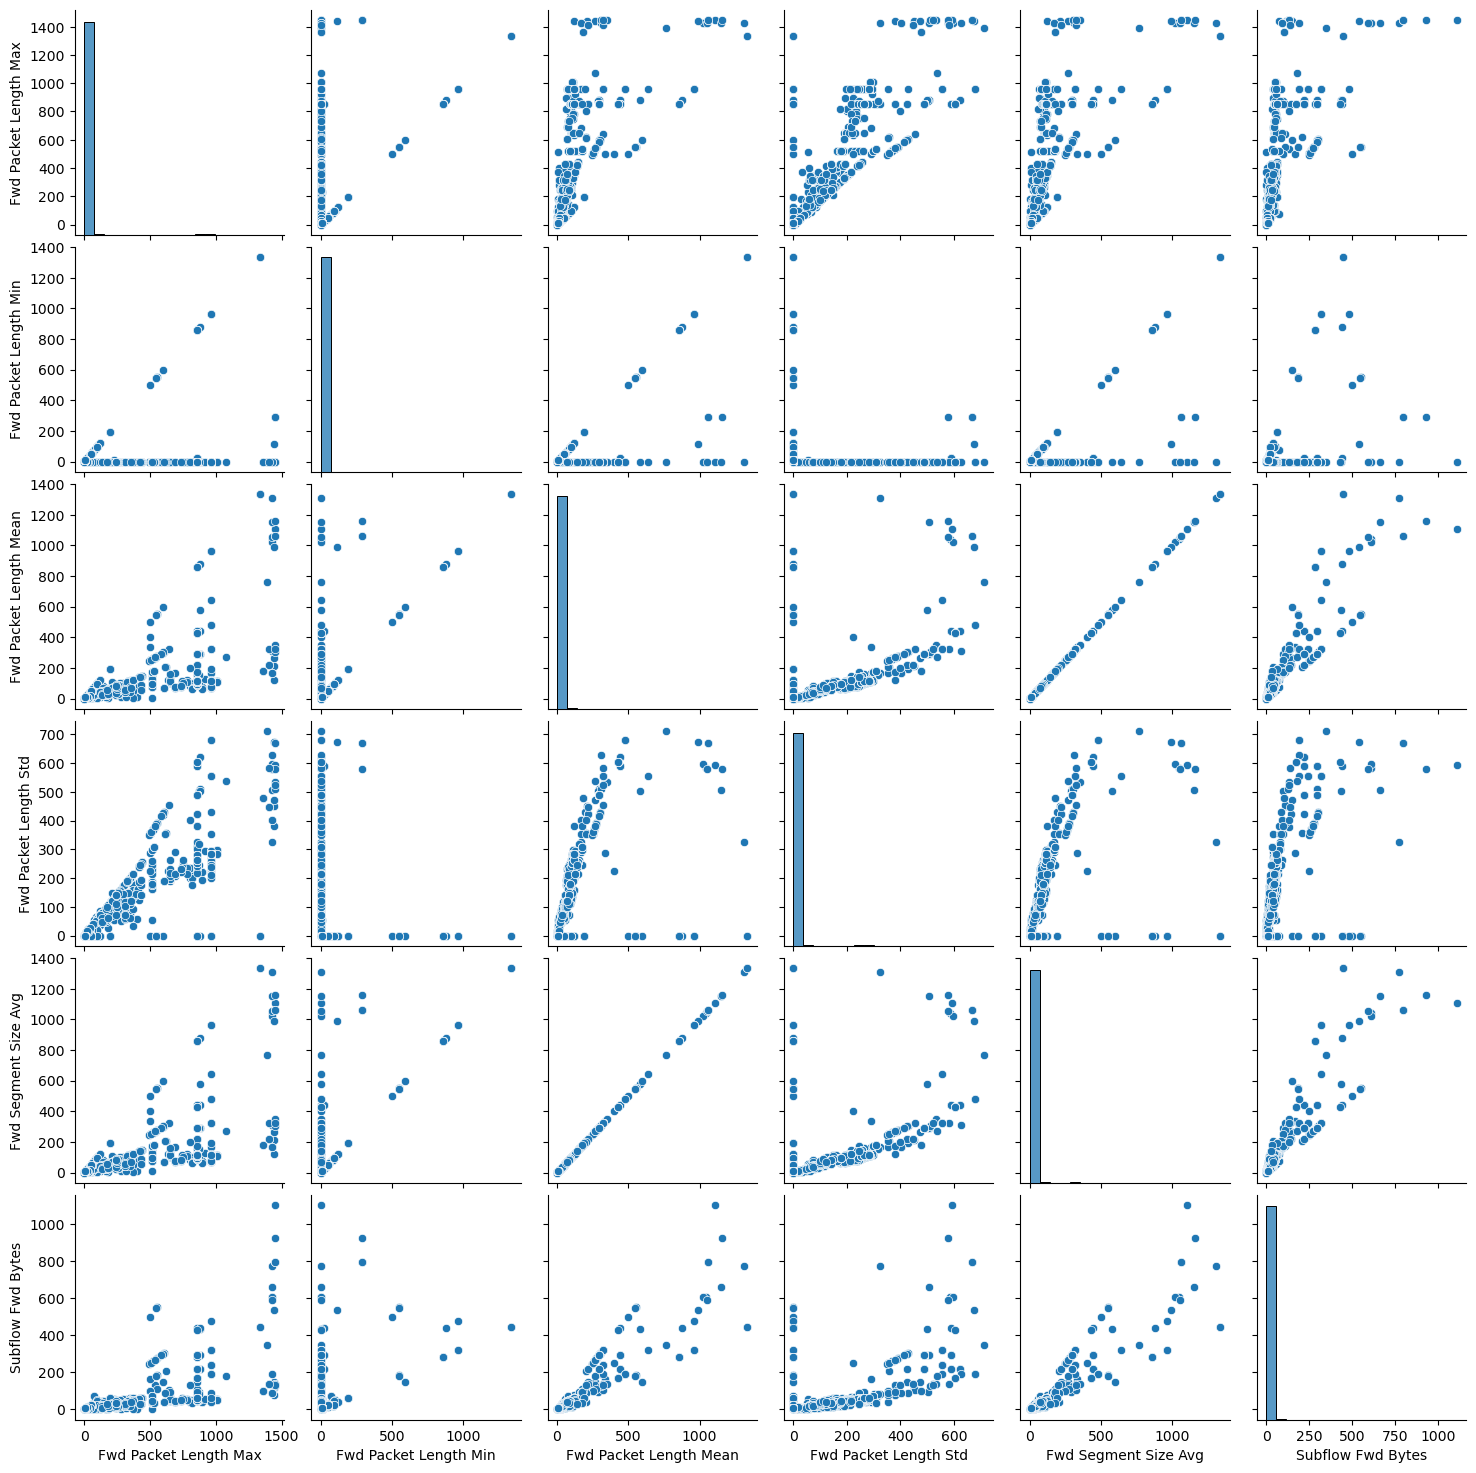

In [425]:
Fwd_Group = Feb6[['Fwd Packet Length Max', 
                  'Fwd Packet Length Min', 
                  'Fwd Packet Length Mean', 
                  'Fwd Packet Length Std', 
                  'Fwd Segment Size Avg', 
                  'Subflow Fwd Bytes']]
sns.pairplot(Fwd_Group)

Column to keep: 'Subflow Fwd Bytes' - Reason: Captures 2 columns over 92%

Resulting dropped columns:'Fwd Packet Length Mean', 'Fwd Segment Size Avg'

<Axes: >

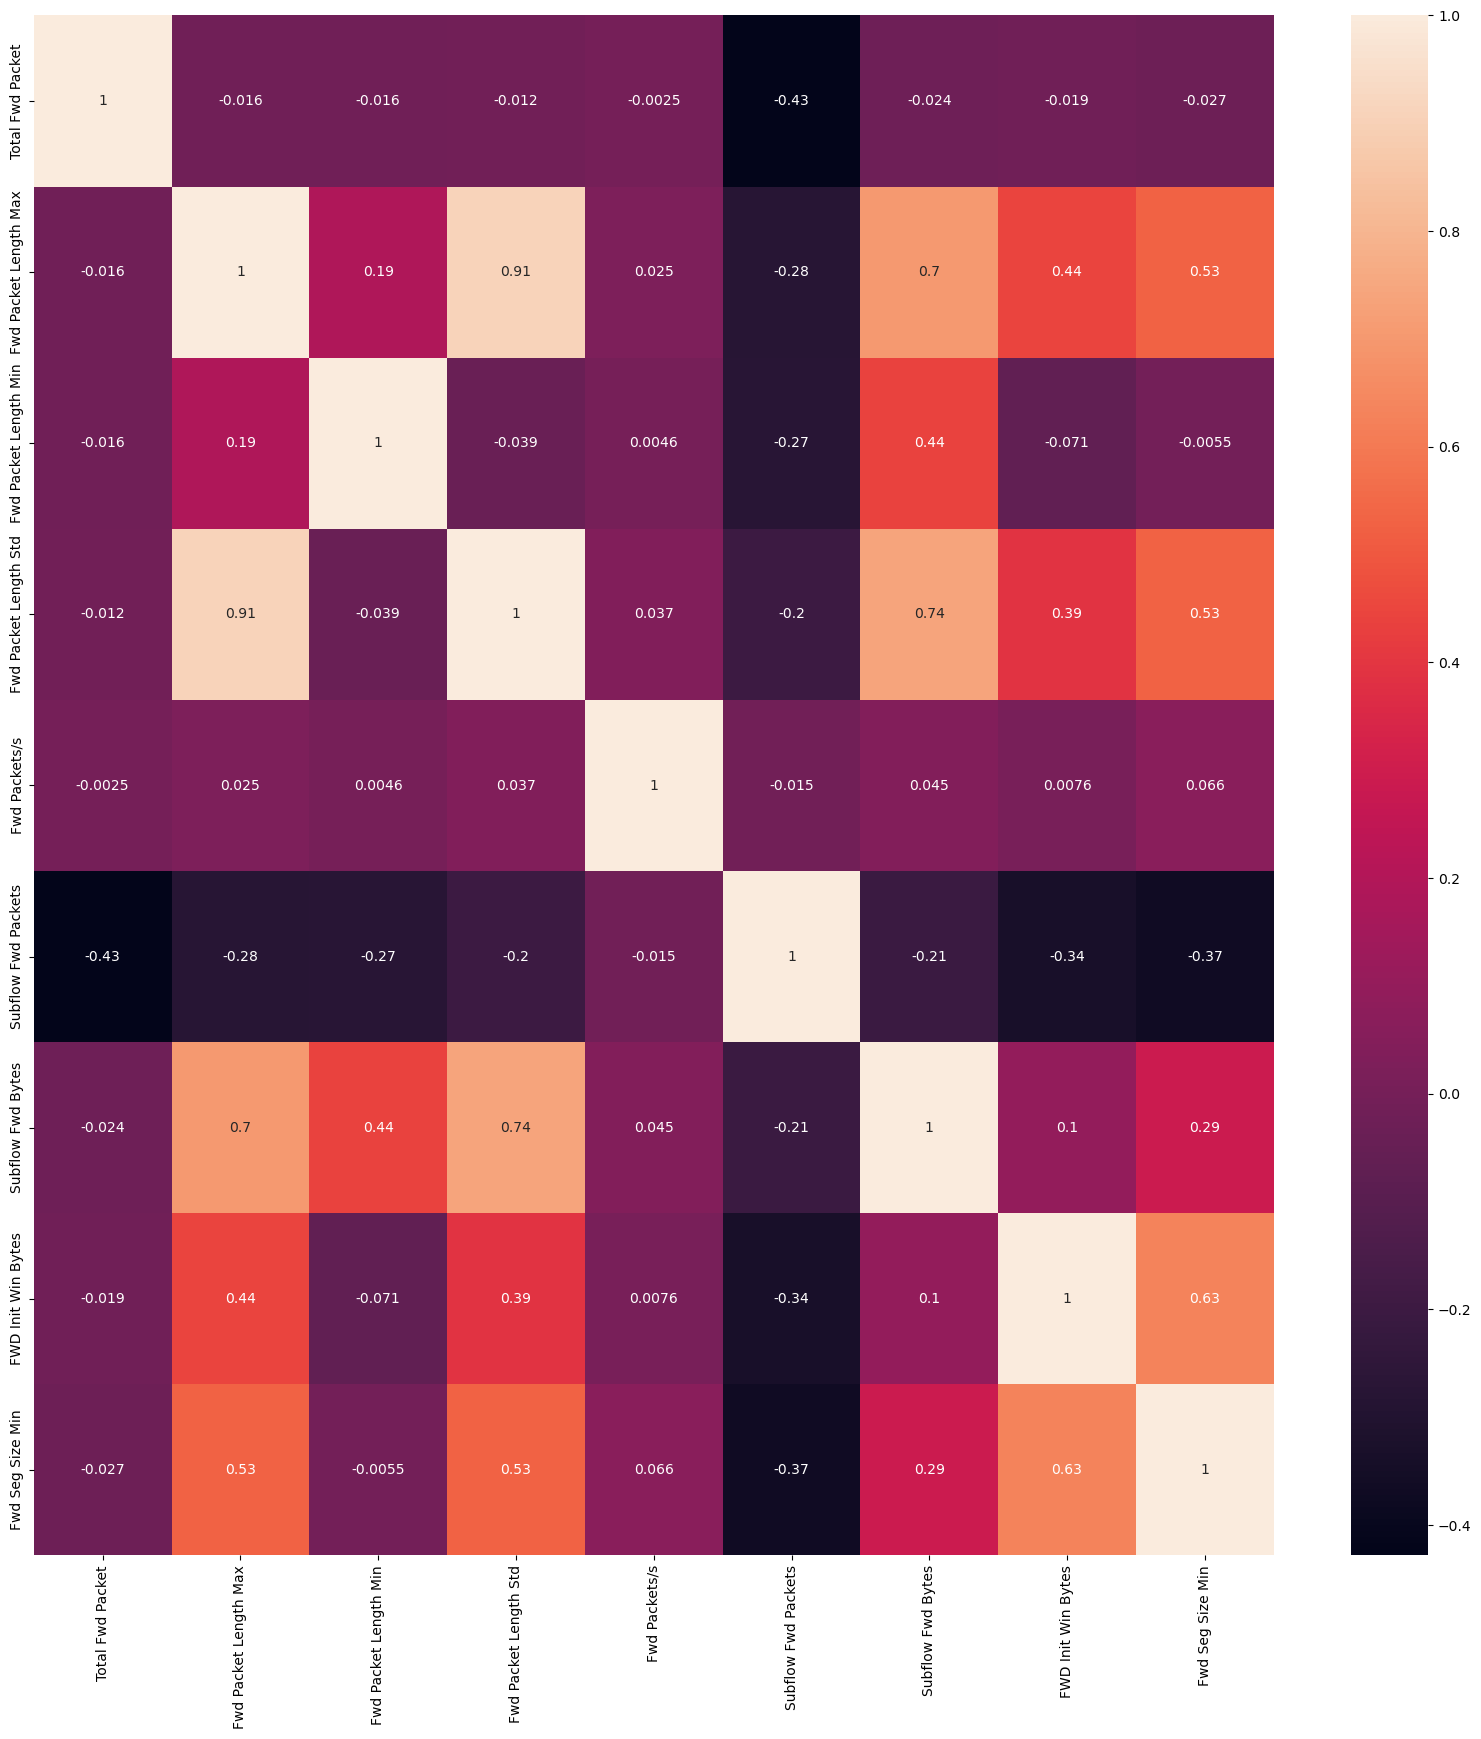

In [426]:
Feb6_Fwd = Feb6_Fwd.drop(columns=['Fwd Packet Length Mean', 'Fwd Segment Size Avg'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_Fwd.corr(), annot=True)

Column to drop: 'Fwd Packet Length Std' - Reason: Very hard between Max and Std but there was a bit more correlation in the Max column overall

In [427]:
Feb6_Fwd = Feb6_Fwd.drop(columns=['Fwd Packet Length Std'])
Fwd_cols = Feb6_Fwd.columns.to_list()

## Backward Flowing Data

<Axes: >

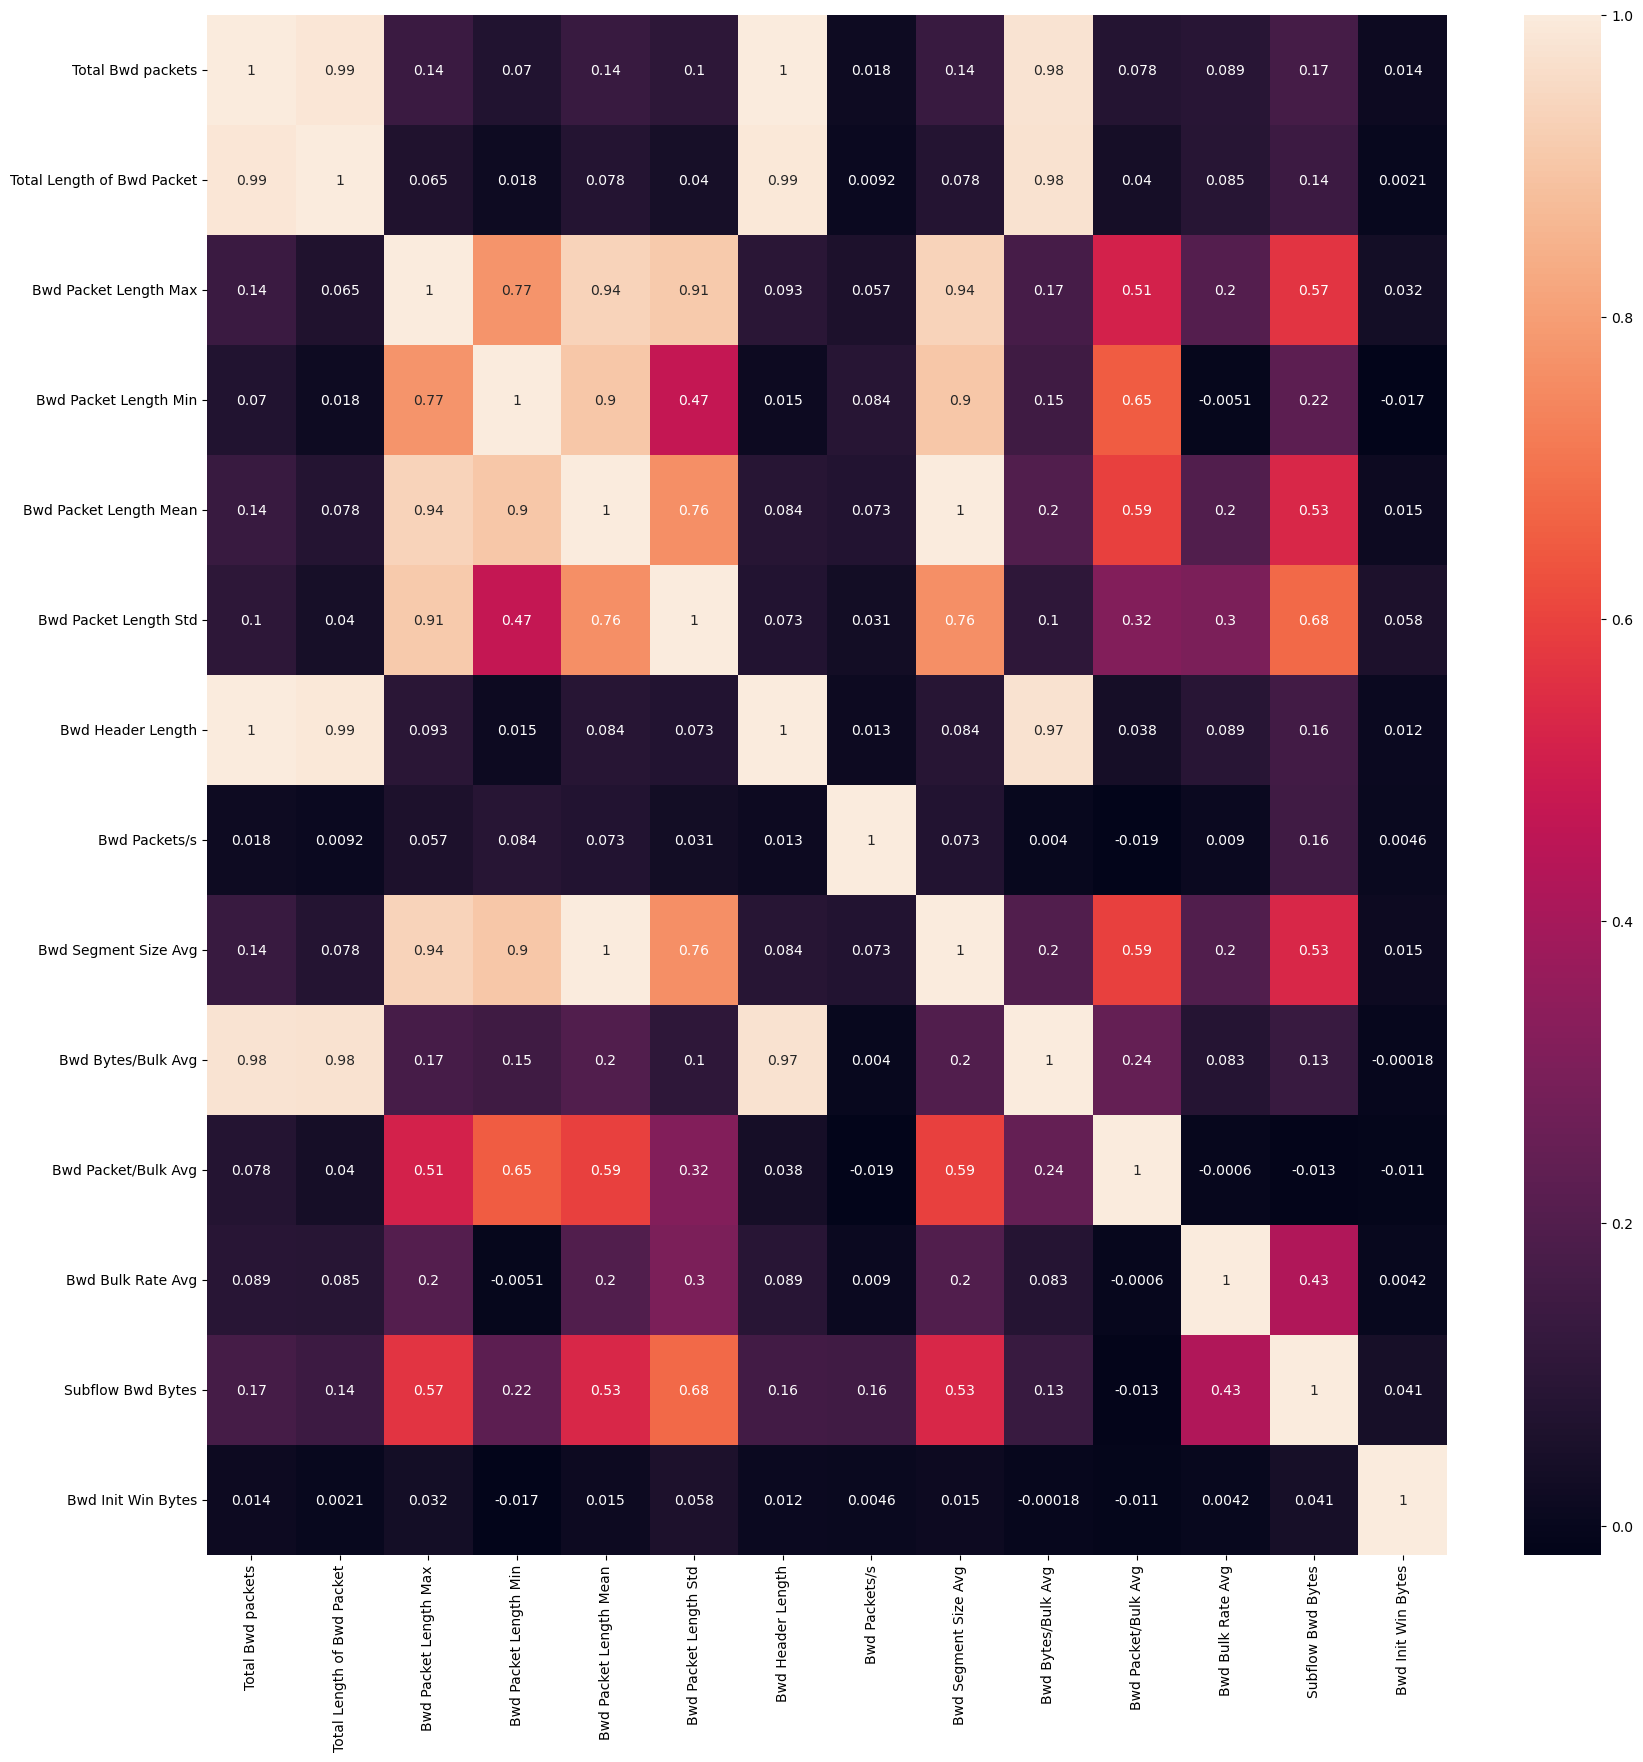

In [428]:
Feb6_Bwd = Feb6[['Total Bwd packets', 
      'Total Length of Bwd Packet', 
      'Bwd Packet Length Max', 
      'Bwd Packet Length Min', 
      'Bwd Packet Length Mean', 
      'Bwd Packet Length Std',   
      'Bwd Header Length',
      'Bwd Packets/s', 
      'Bwd Segment Size Avg', 
      'Bwd Bytes/Bulk Avg', 
      'Bwd Packet/Bulk Avg', 
      'Bwd Bulk Rate Avg', 
      'Subflow Bwd Bytes', 
      'Bwd Init Win Bytes']]
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_Bwd.corr(), annot=True)

Column to keep: 'Total Bwd packets' - Reason: Descriptive and covers 99% of 3 columns

Resulting dropped columns: 'Total Length of Bwd Packet','Bwd Header Length', 'Bwd Bytes/Bulk Avg'

<Axes: >

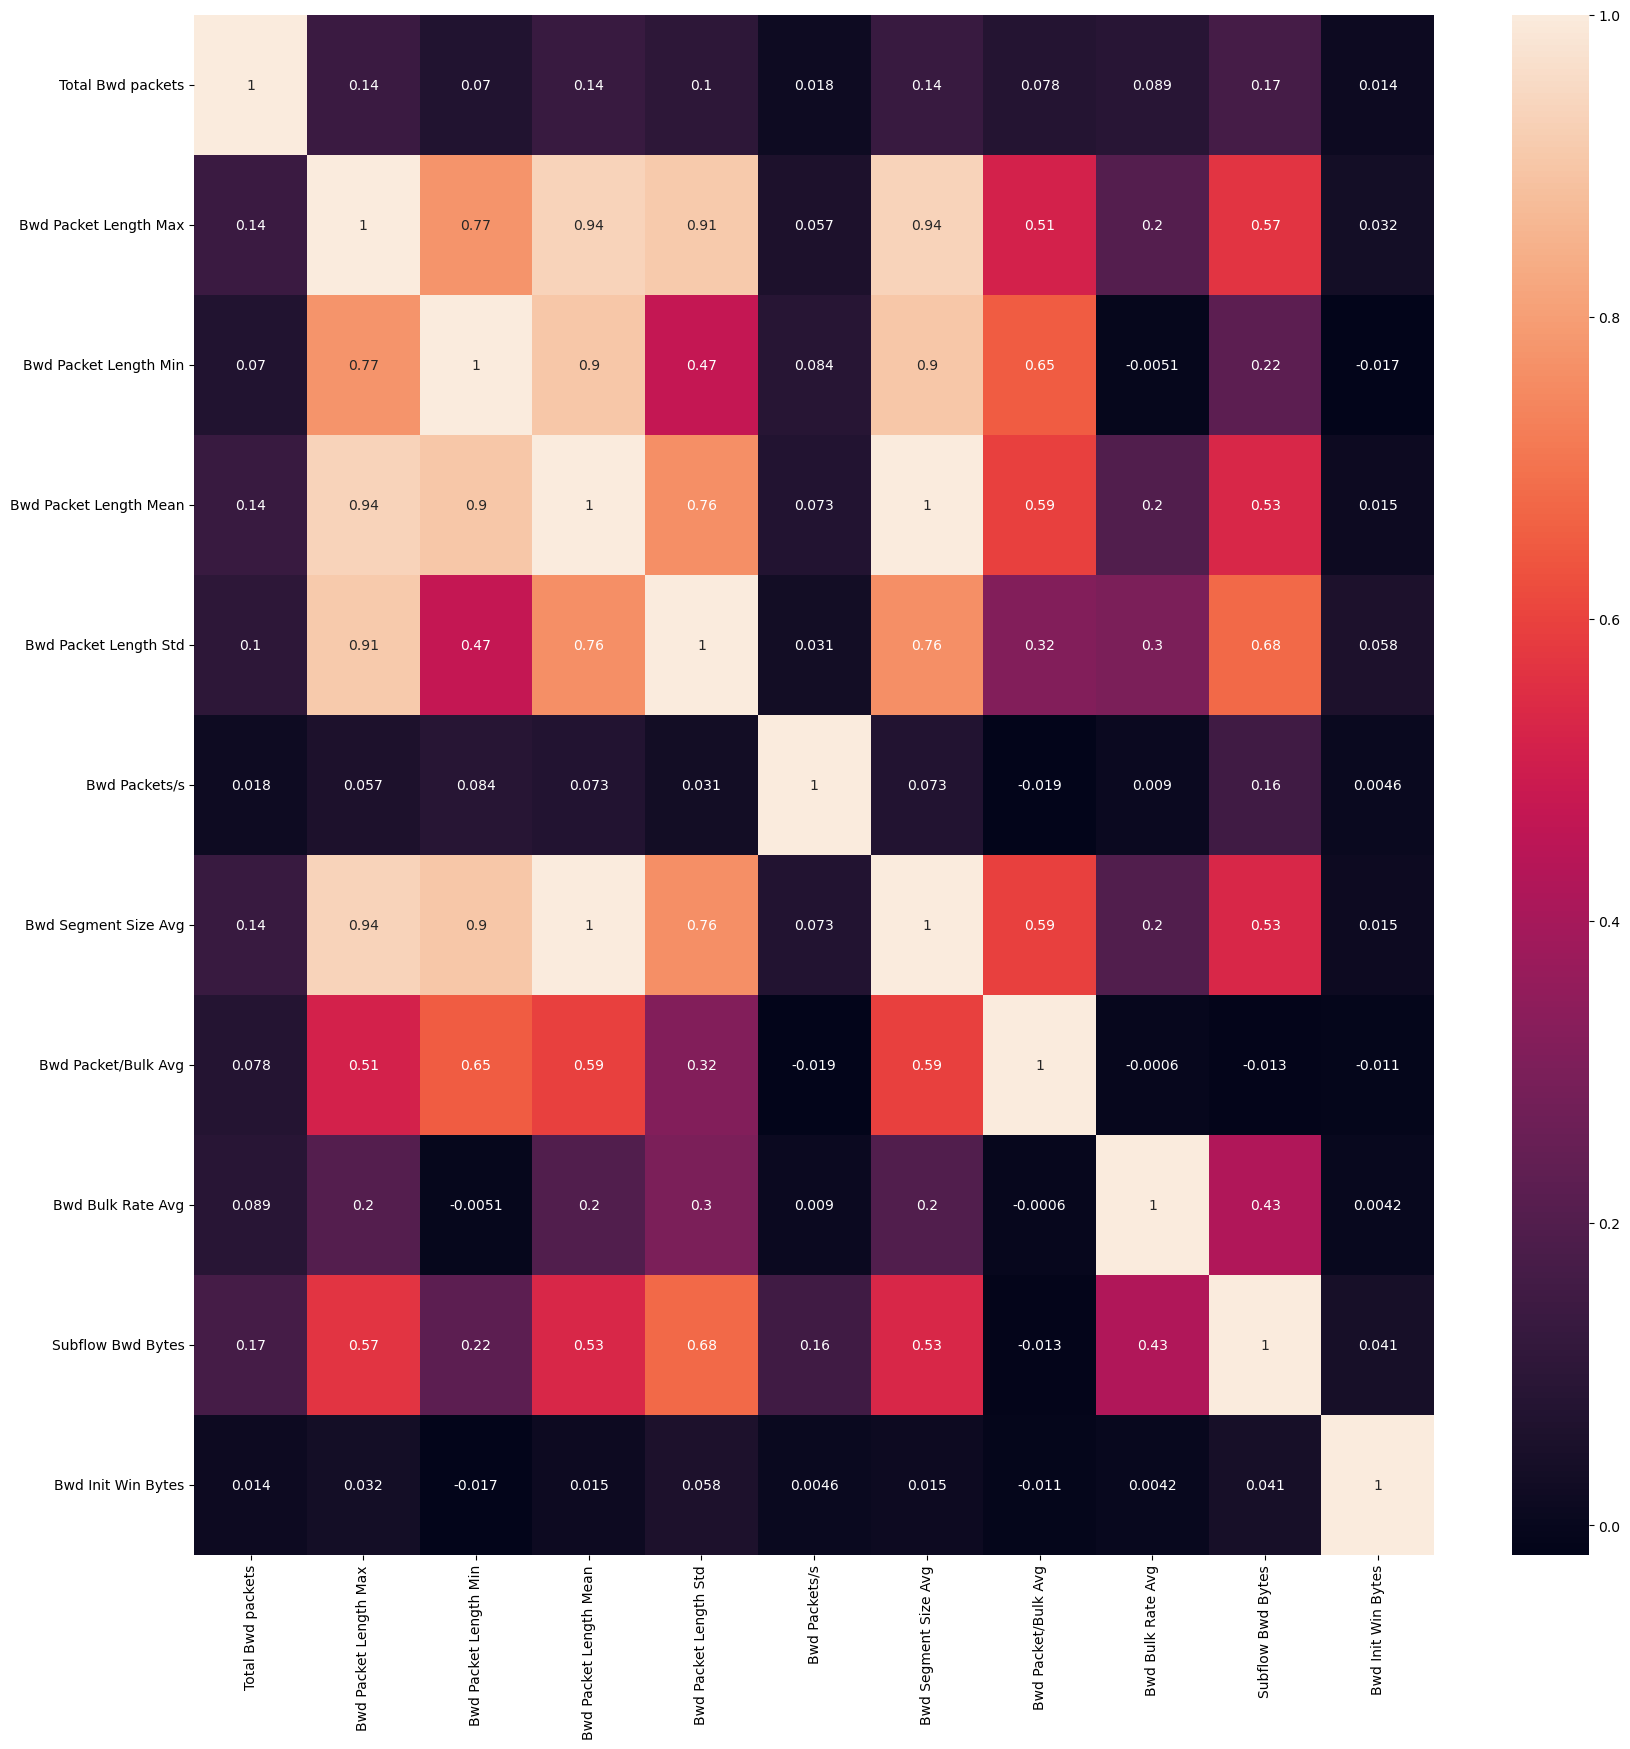

In [429]:
Feb6_Bwd = Feb6_Bwd.drop(columns=['Total Length of Bwd Packet','Bwd Header Length', 'Bwd Bytes/Bulk Avg'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_Bwd.corr(), annot=True)

Column to keep: 'Bwd Packet Length Max' - Reason: captures 3 columes at over 91%

Resulting Columns dropped: 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Bwd Segment Size Avg'

<Axes: >

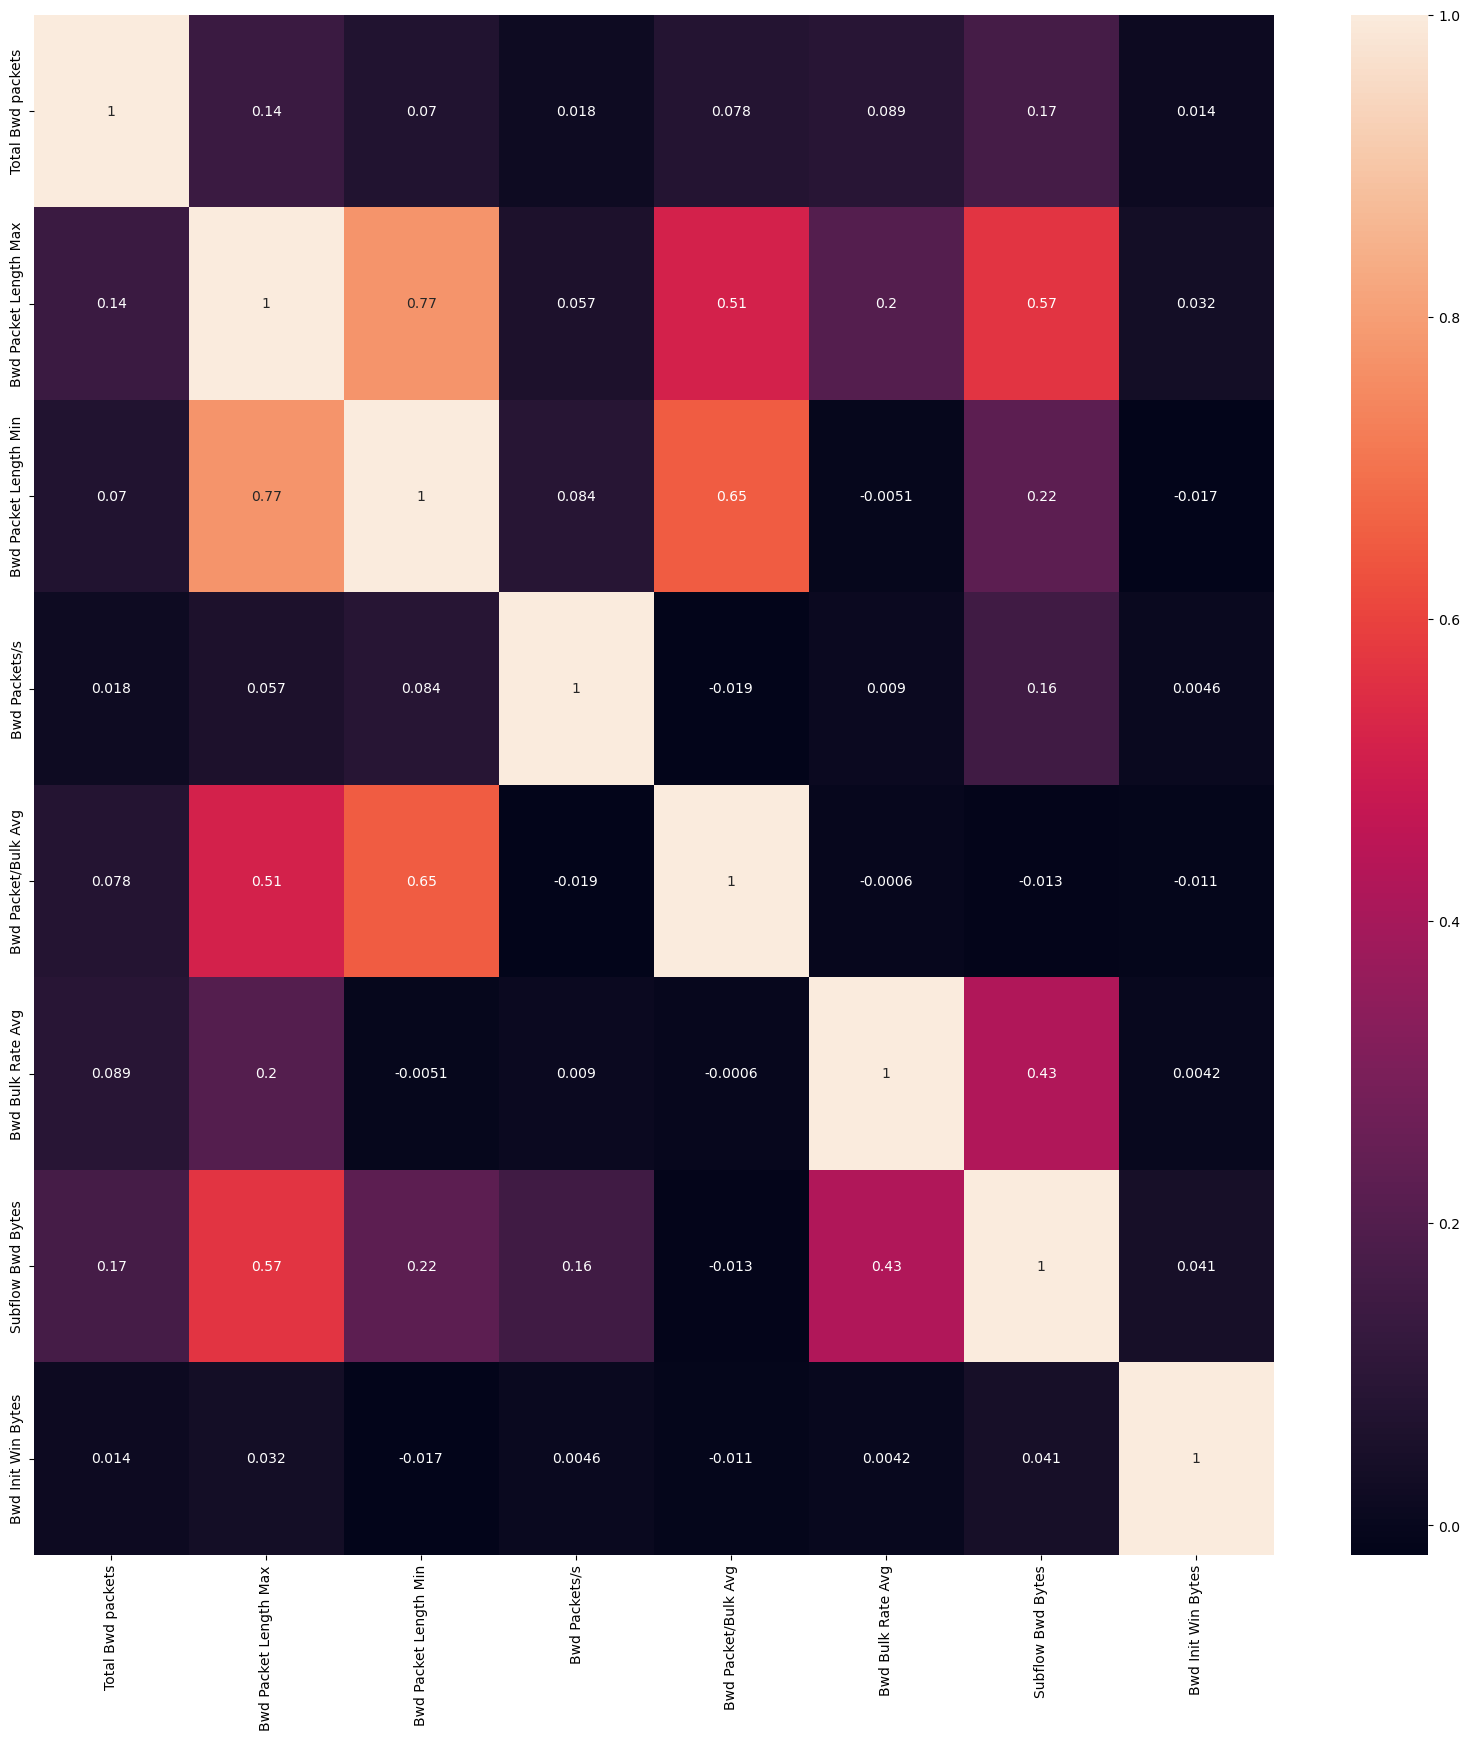

In [430]:
Feb6_Bwd = Feb6_Bwd.drop(columns=['Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Bwd Segment Size Avg'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_Bwd.corr(), annot=True)

In [431]:
Bwd_cols = Feb6_Bwd.columns.to_list()

## Flow

<Axes: >

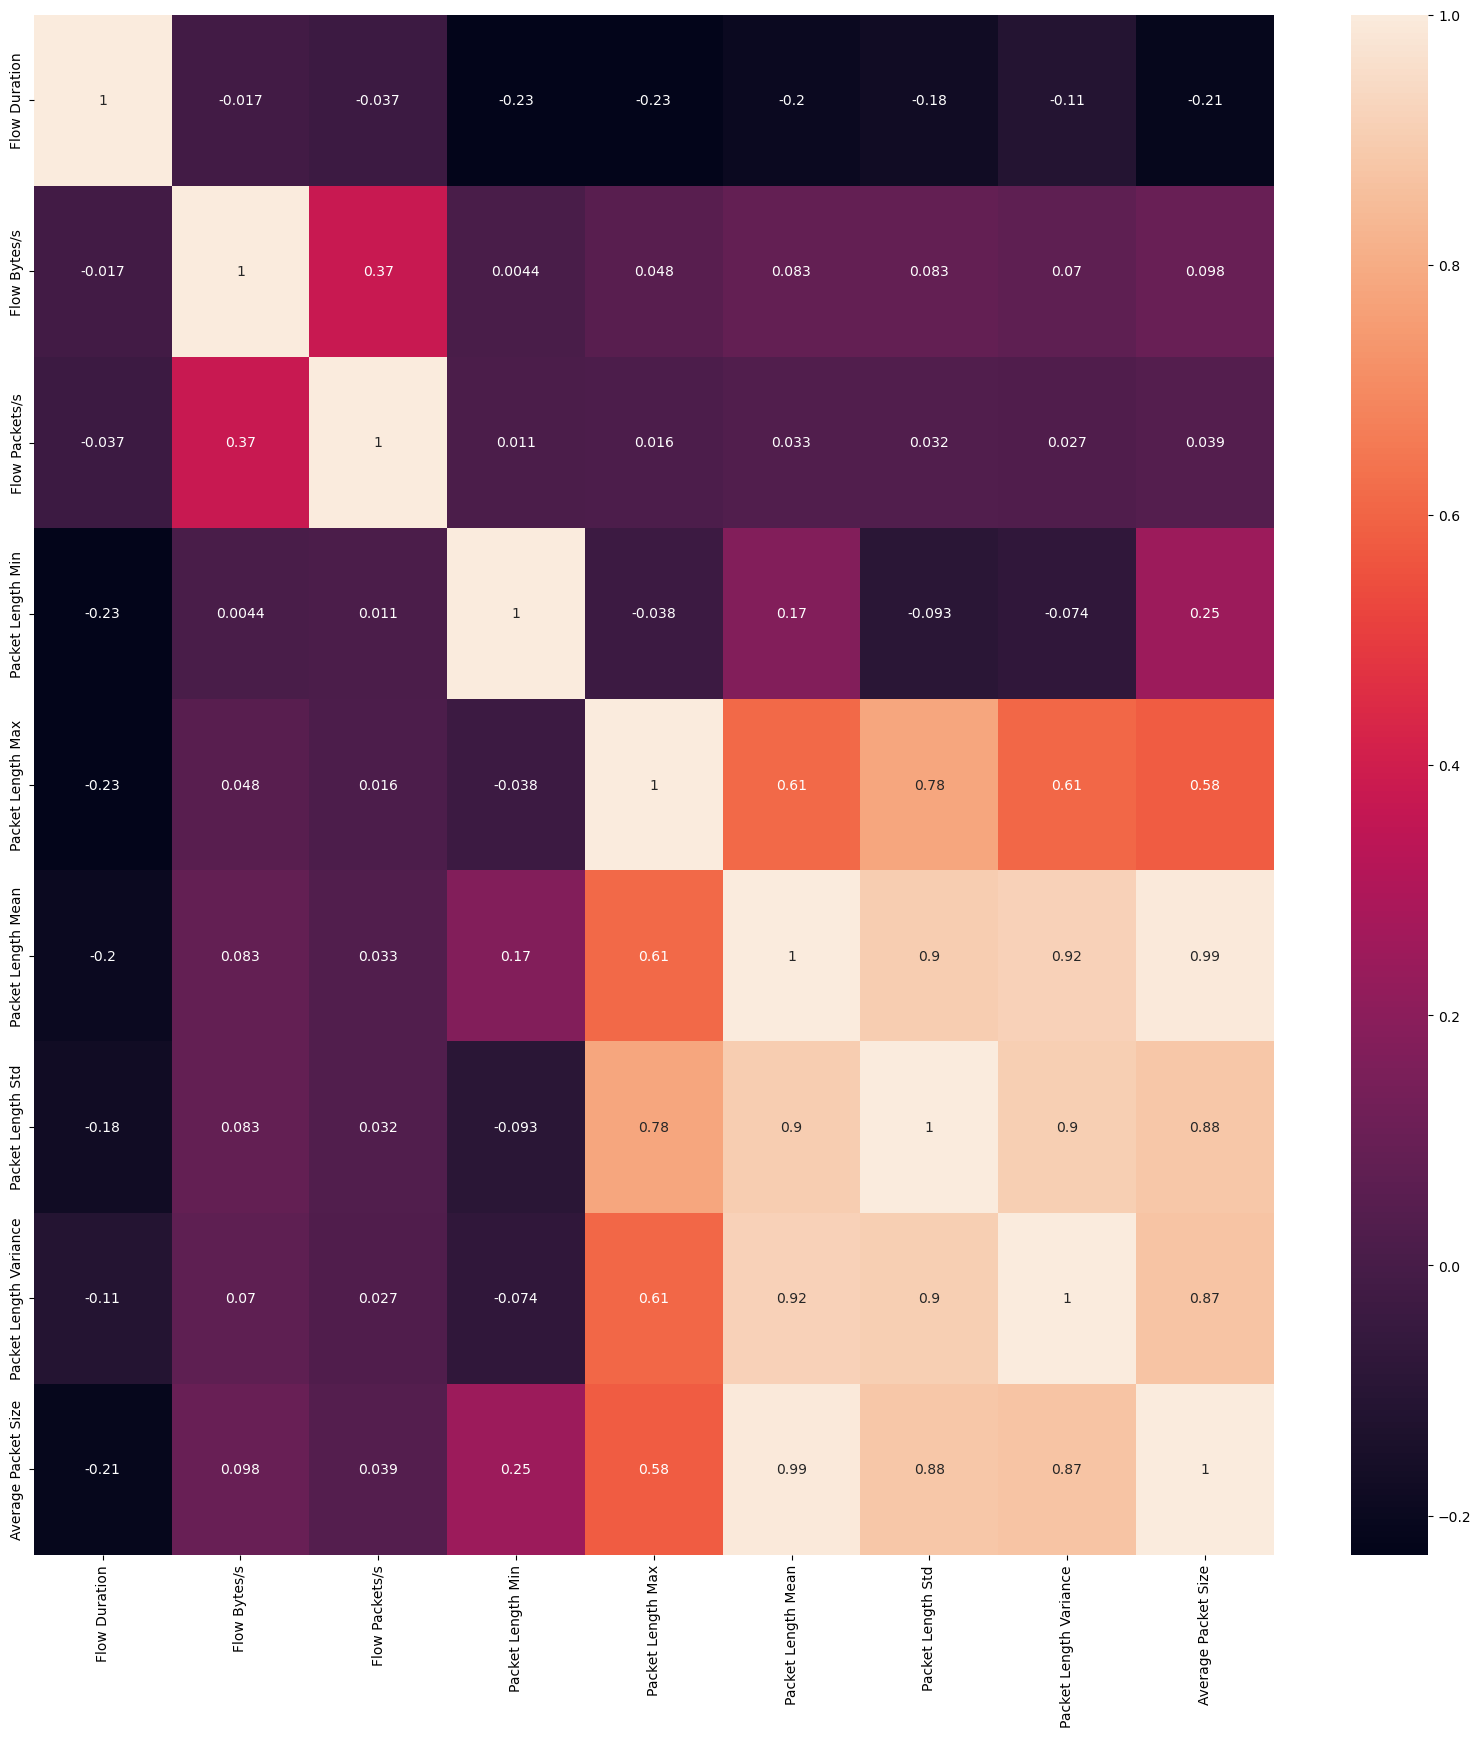

In [432]:
Feb6_flow = Feb6[['Flow Duration', 
                  'Flow Bytes/s', 
                  'Flow Packets/s', 
                  'Packet Length Min', 
                  'Packet Length Max', 
                  'Packet Length Mean', 
                  'Packet Length Std', 
                  'Packet Length Variance', 
                  'Average Packet Size']]
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_flow.corr(),annot=True)

Column to keep: Packet Length Mean - Representitive and robust, covers 90%+ of 3 columns

Resulting dropped columns: 'Packet Length Std','Packet Length Variance','Average Packet Size'

<Axes: >

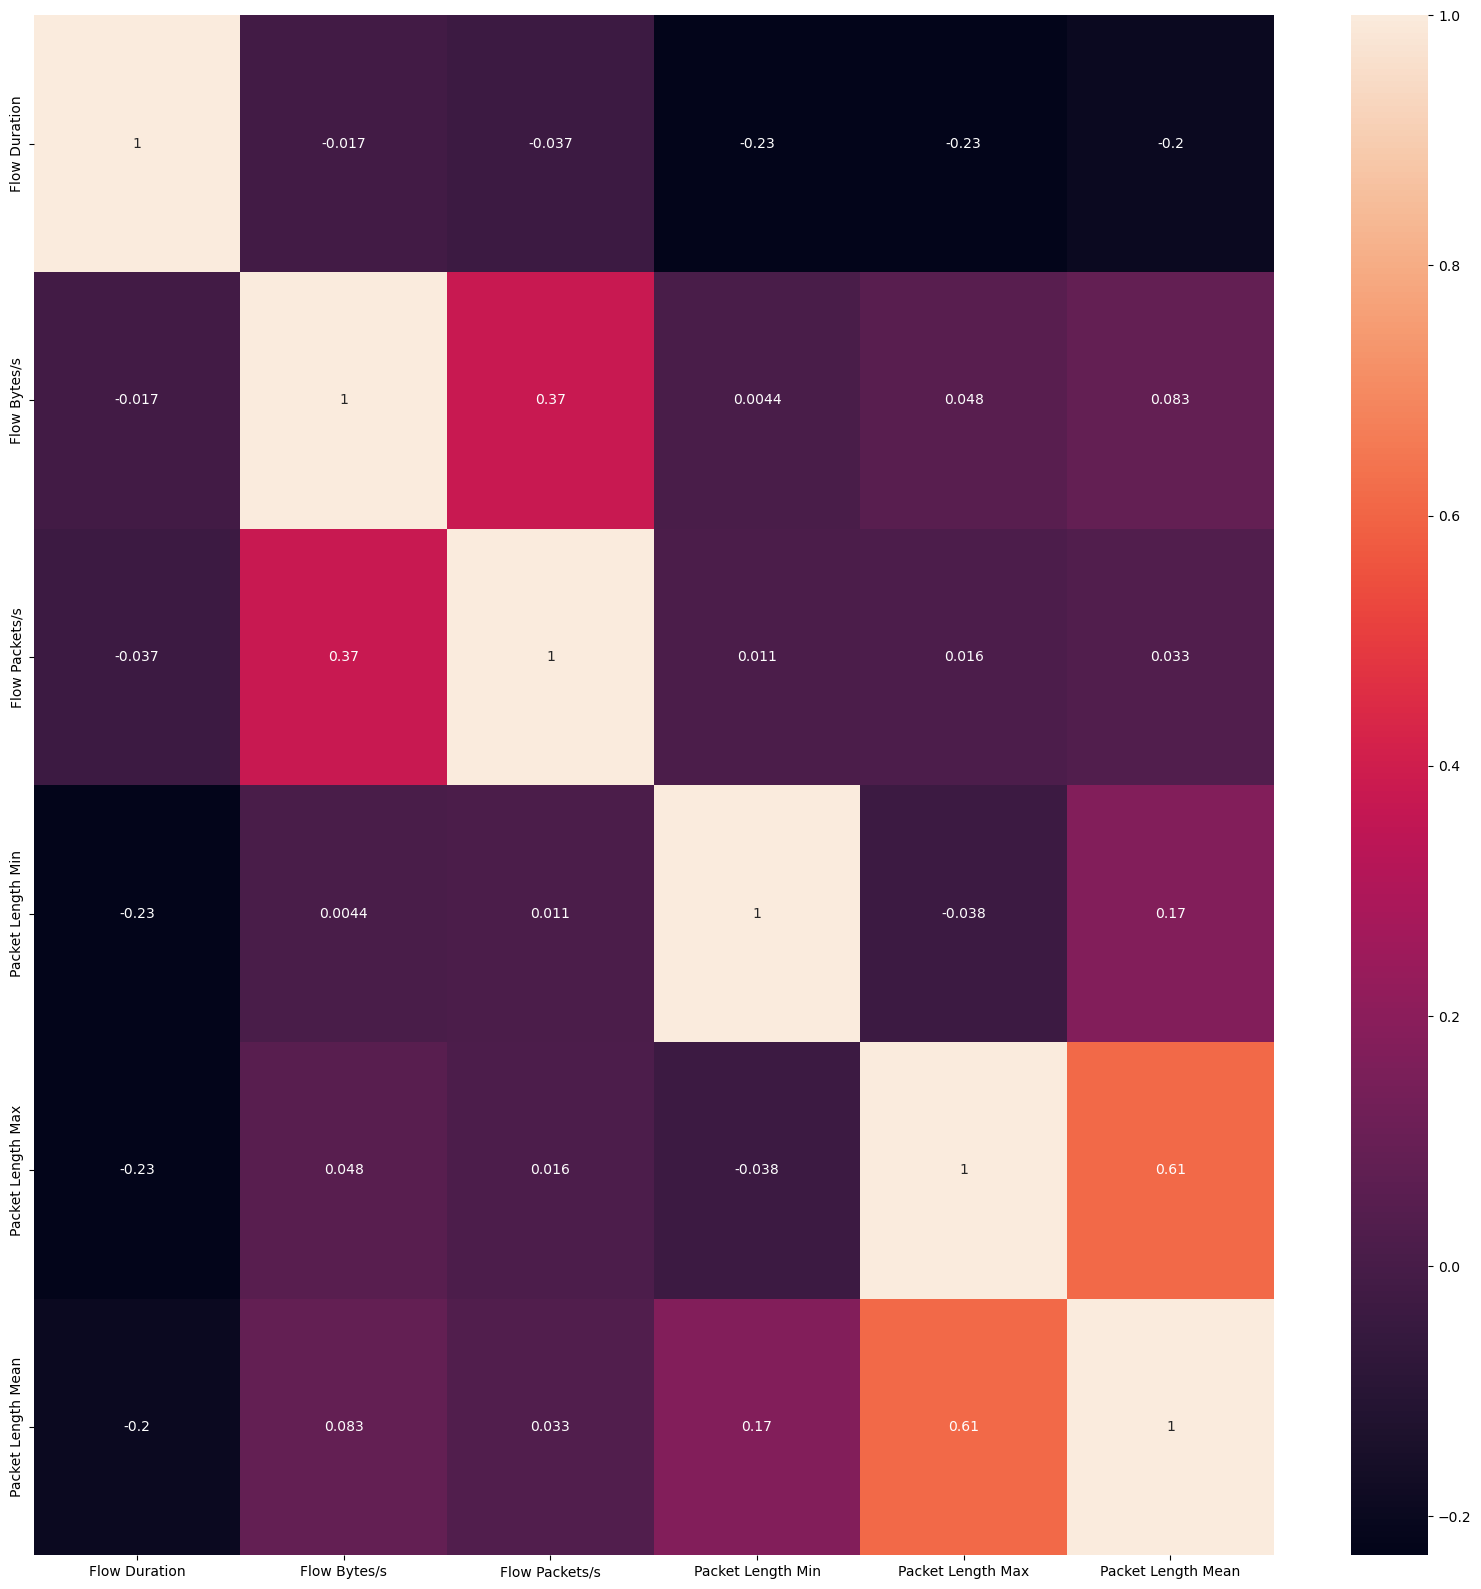

In [433]:
Feb6_flow = Feb6_flow.drop(columns=['Packet Length Std','Packet Length Variance','Average Packet Size'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_flow.corr(),annot=True)

In [434]:
flow_cols = Feb6_flow.columns.to_list()

## Forward + Backward + Flow

<Axes: >

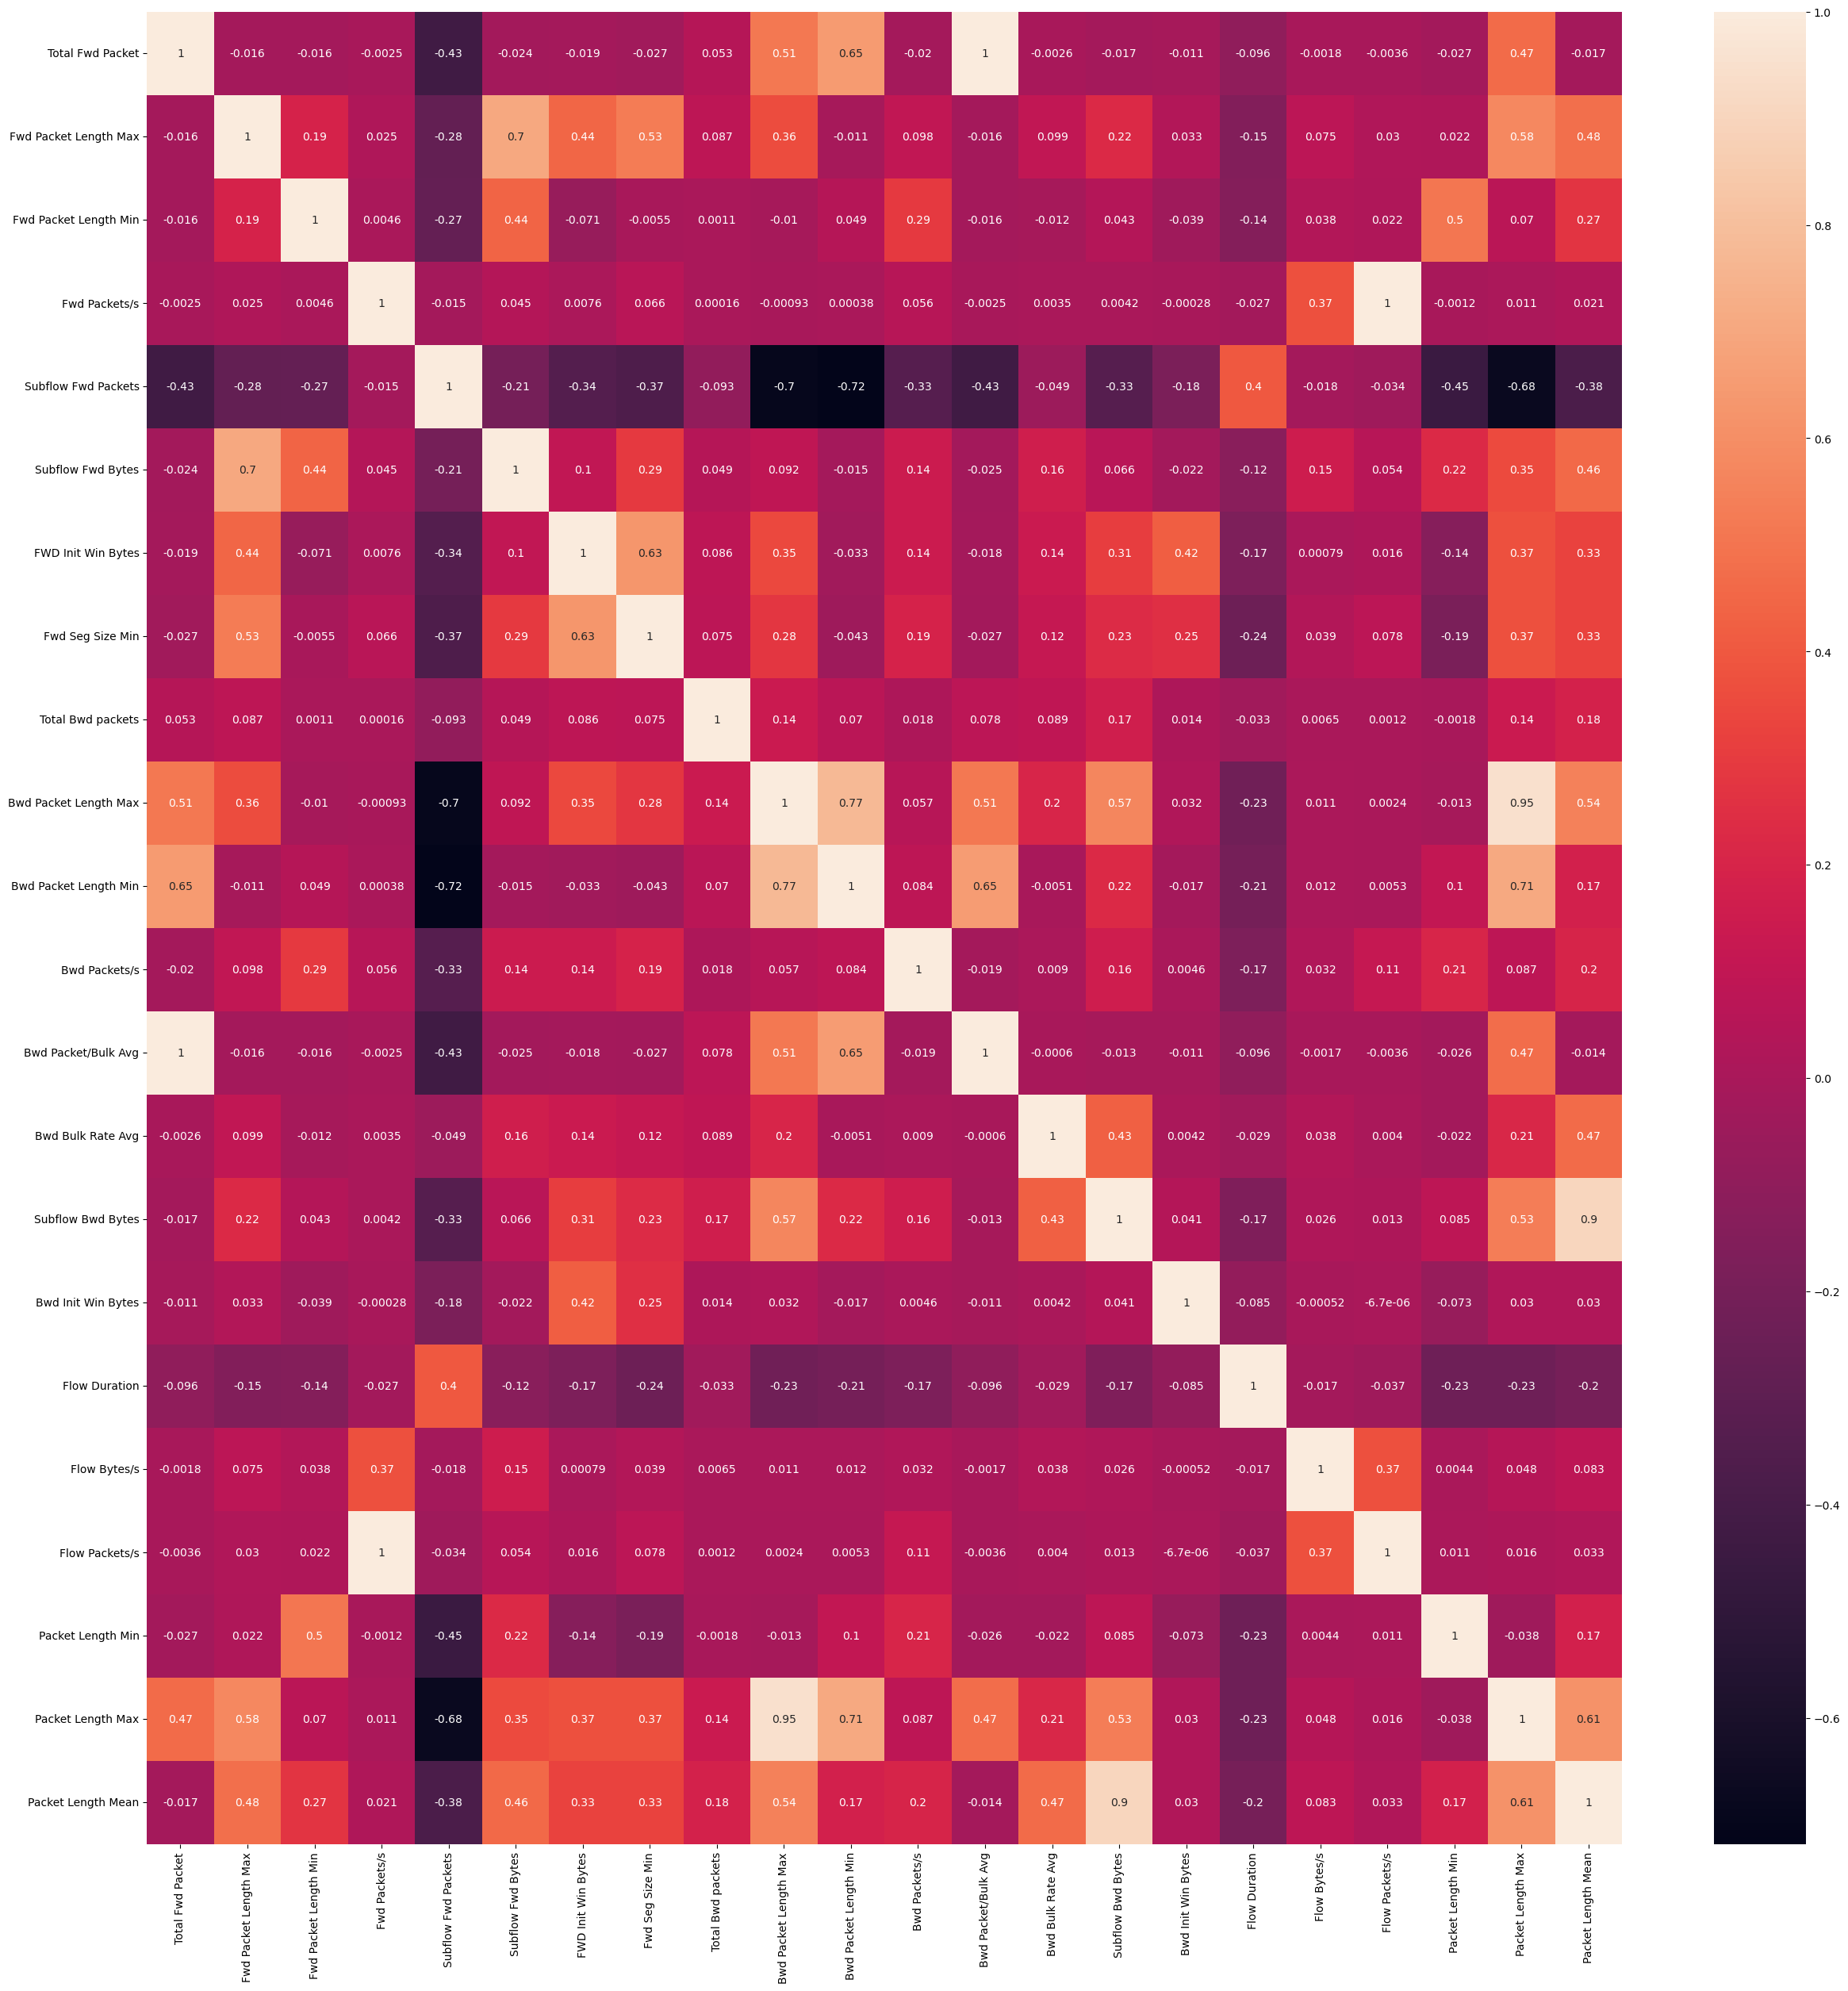

In [435]:
Fwd_Bwd =  Fwd_cols + Bwd_cols + flow_cols
Feb6_Fwd_Bwd = Feb6[Fwd_Bwd]
plt.figure(figsize=(30,30))
sns.heatmap(Feb6_Fwd_Bwd.corr(), annot=True)

Columns to drop: 'Bwd Packet/Bulk Avg', 'Fwd Packets/s', 'Bwd Packet Length Max', 'Subflow Bwd Bytes' - Reason: All four columns are represented 90% by more robust columns.

<Axes: >

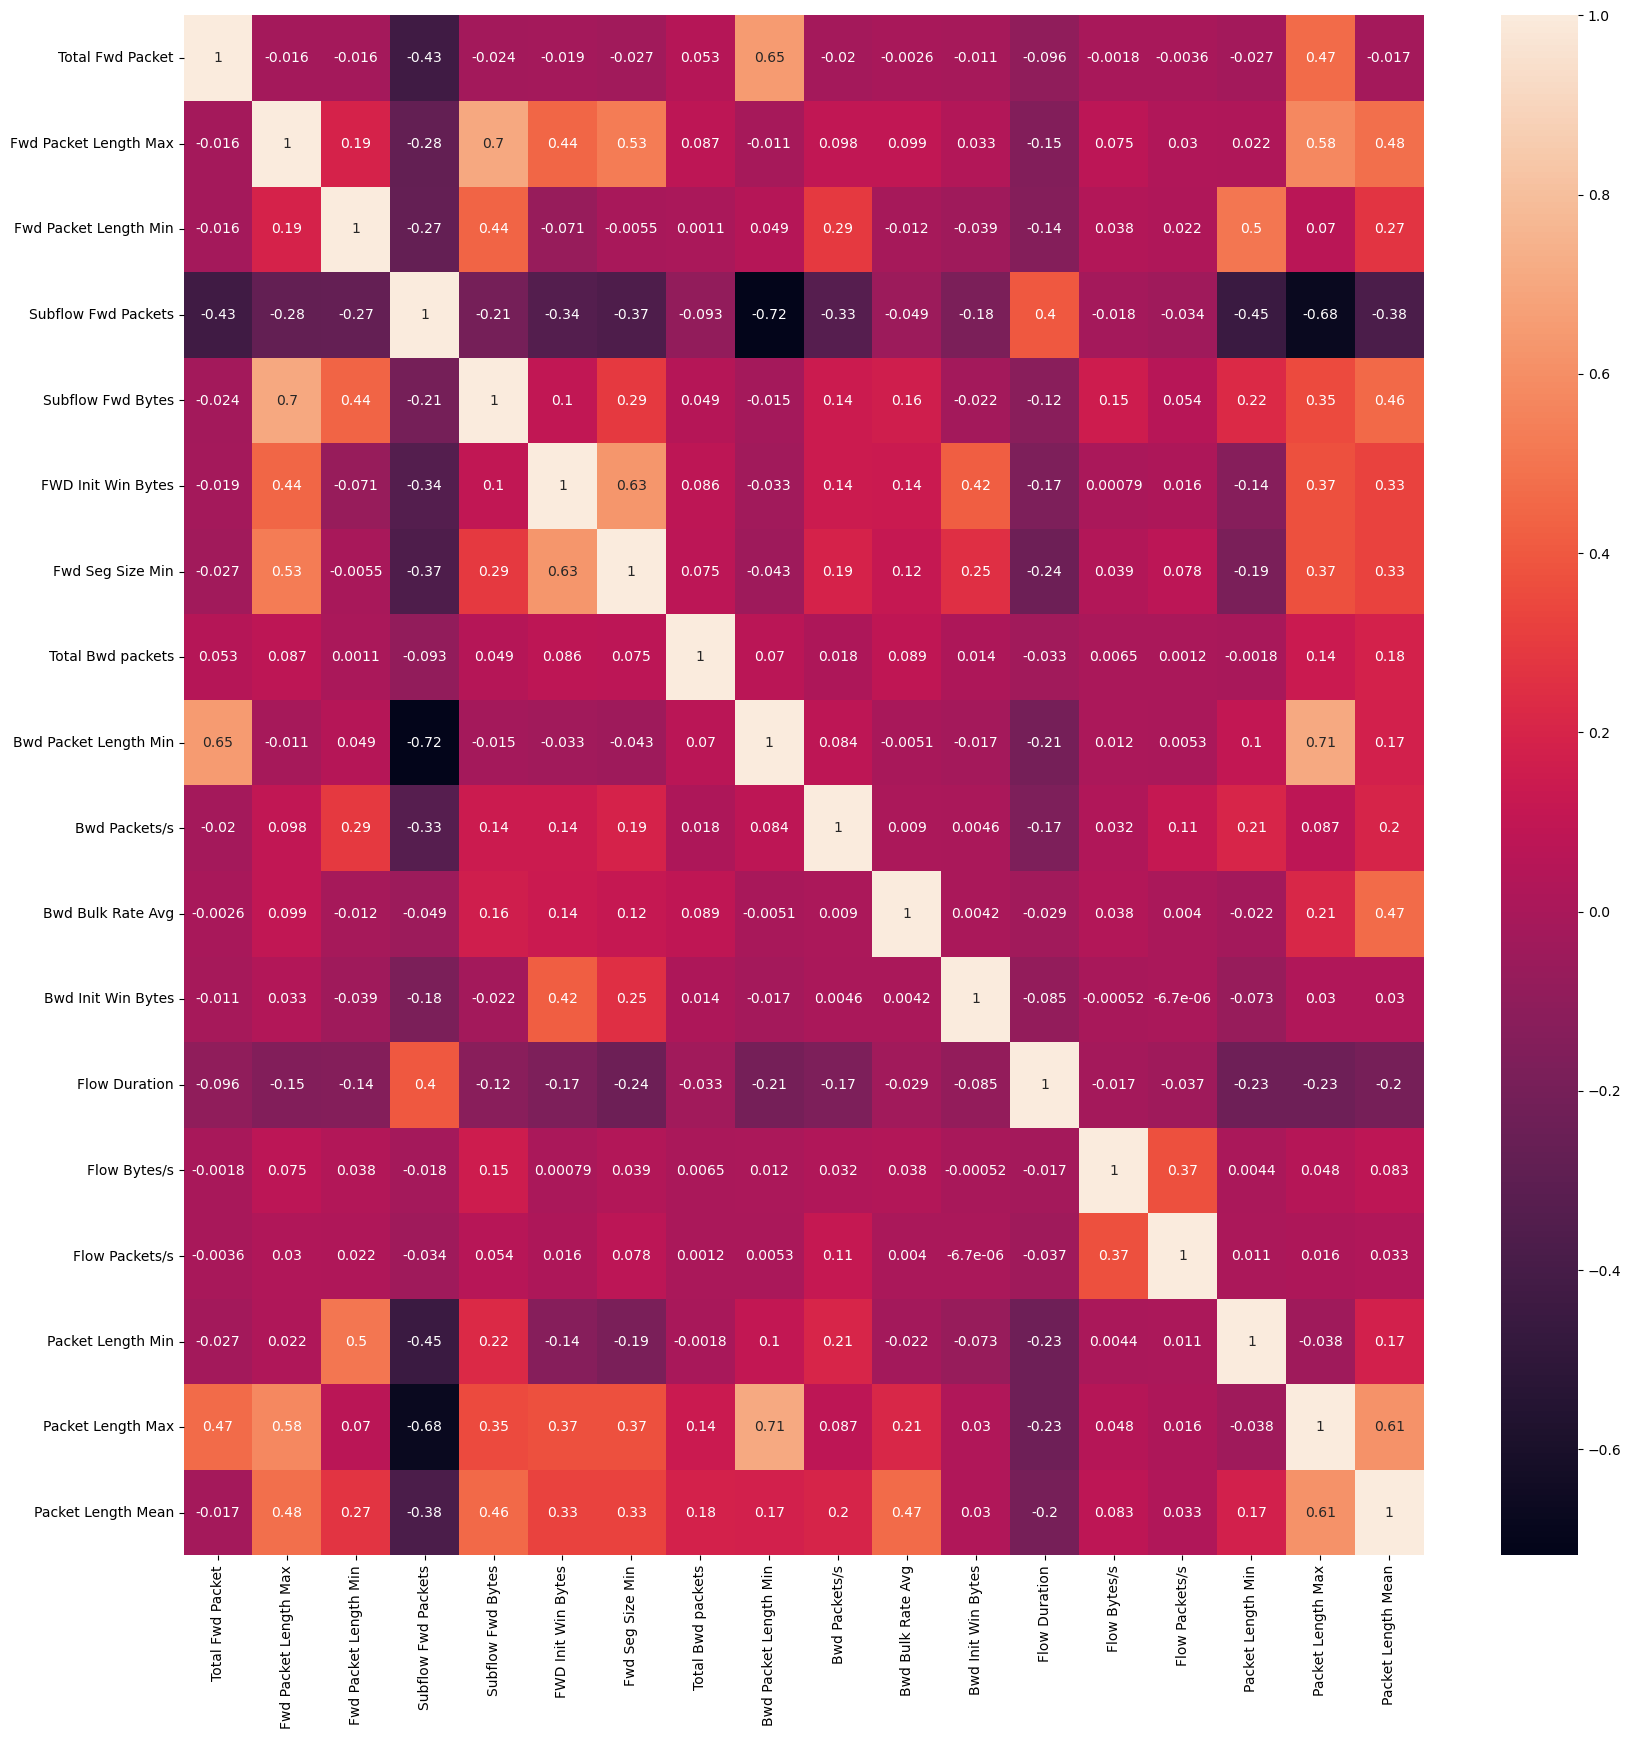

In [436]:
Feb6_Fwd_Bwd = Feb6_Fwd_Bwd.drop(columns=['Bwd Packet/Bulk Avg', 'Fwd Packets/s', 'Bwd Packet Length Max','Subflow Bwd Bytes'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_Fwd_Bwd.corr(),annot=True)

In [437]:
Fwd_Bwd_cols = Feb6_Fwd_Bwd.columns.to_list()

## Inter-Arrival Time (IAT)

<Axes: >

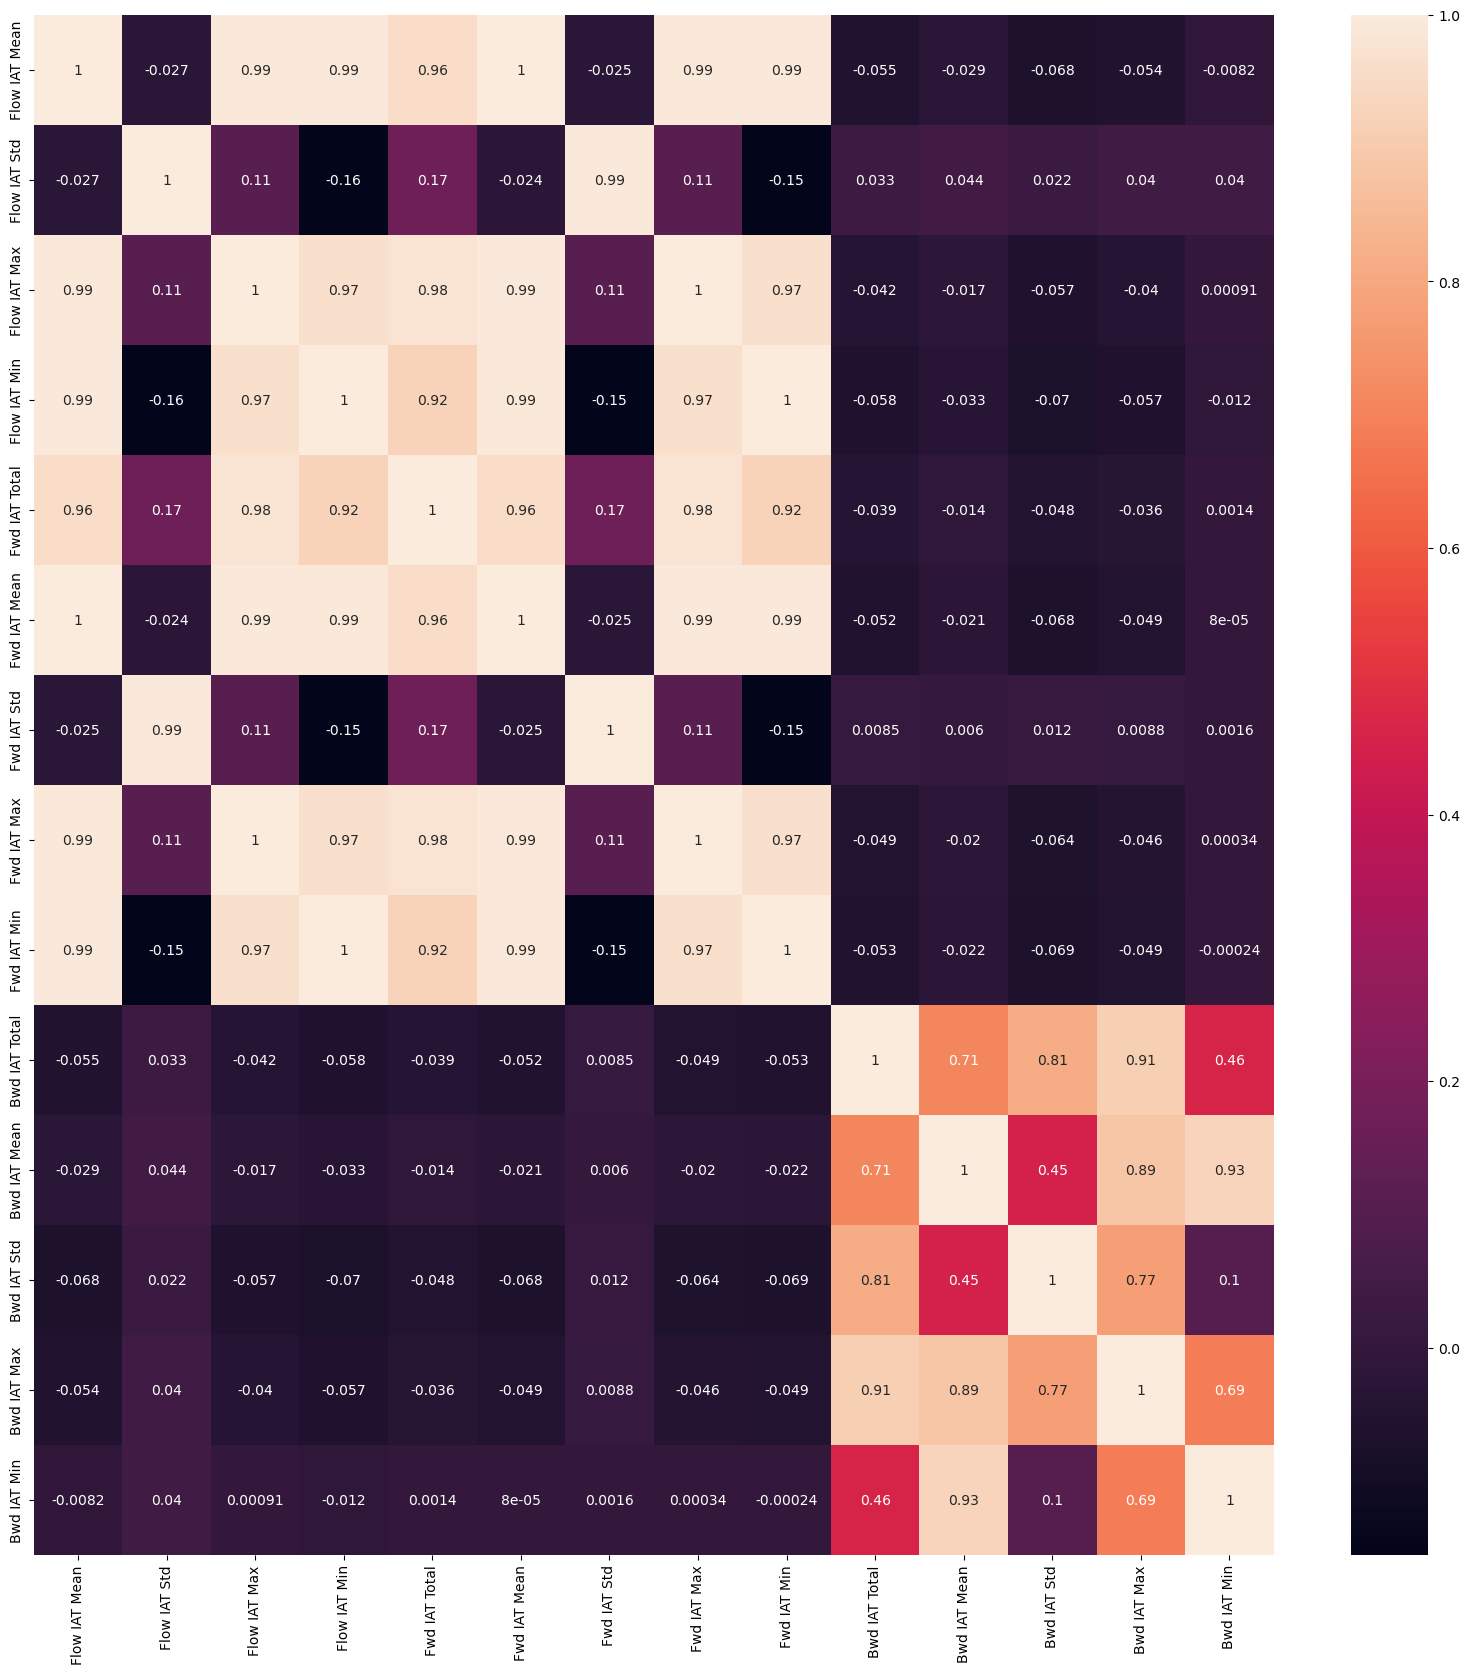

In [438]:
Feb6_IAT = Feb6[['Flow IAT Mean', 
                 'Flow IAT Std', 
                 'Flow IAT Max', 
                 'Flow IAT Min', 
                 'Fwd IAT Total', 
                 'Fwd IAT Mean', 
                 'Fwd IAT Std', 
                 'Fwd IAT Max', 
                 'Fwd IAT Min', 
                 'Bwd IAT Total', 
                 'Bwd IAT Mean', 
                 'Bwd IAT Std',
                 'Bwd IAT Max', 
                 'Bwd IAT Min']]
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_IAT.corr(),annot=True)

Columns to keep: 'Bwd IAT Mean', 'Fwd IAT Mean' - Reason

Resulting dropped columns: 'Bwd IAT Max', 'Bwd IAT Min', 'Flow IAT Mean','Flow IAT Max','Flow IAT Min','Fwd IAT Total','Fwd IAT Max', 'Fwd IAT Min'

<Axes: >

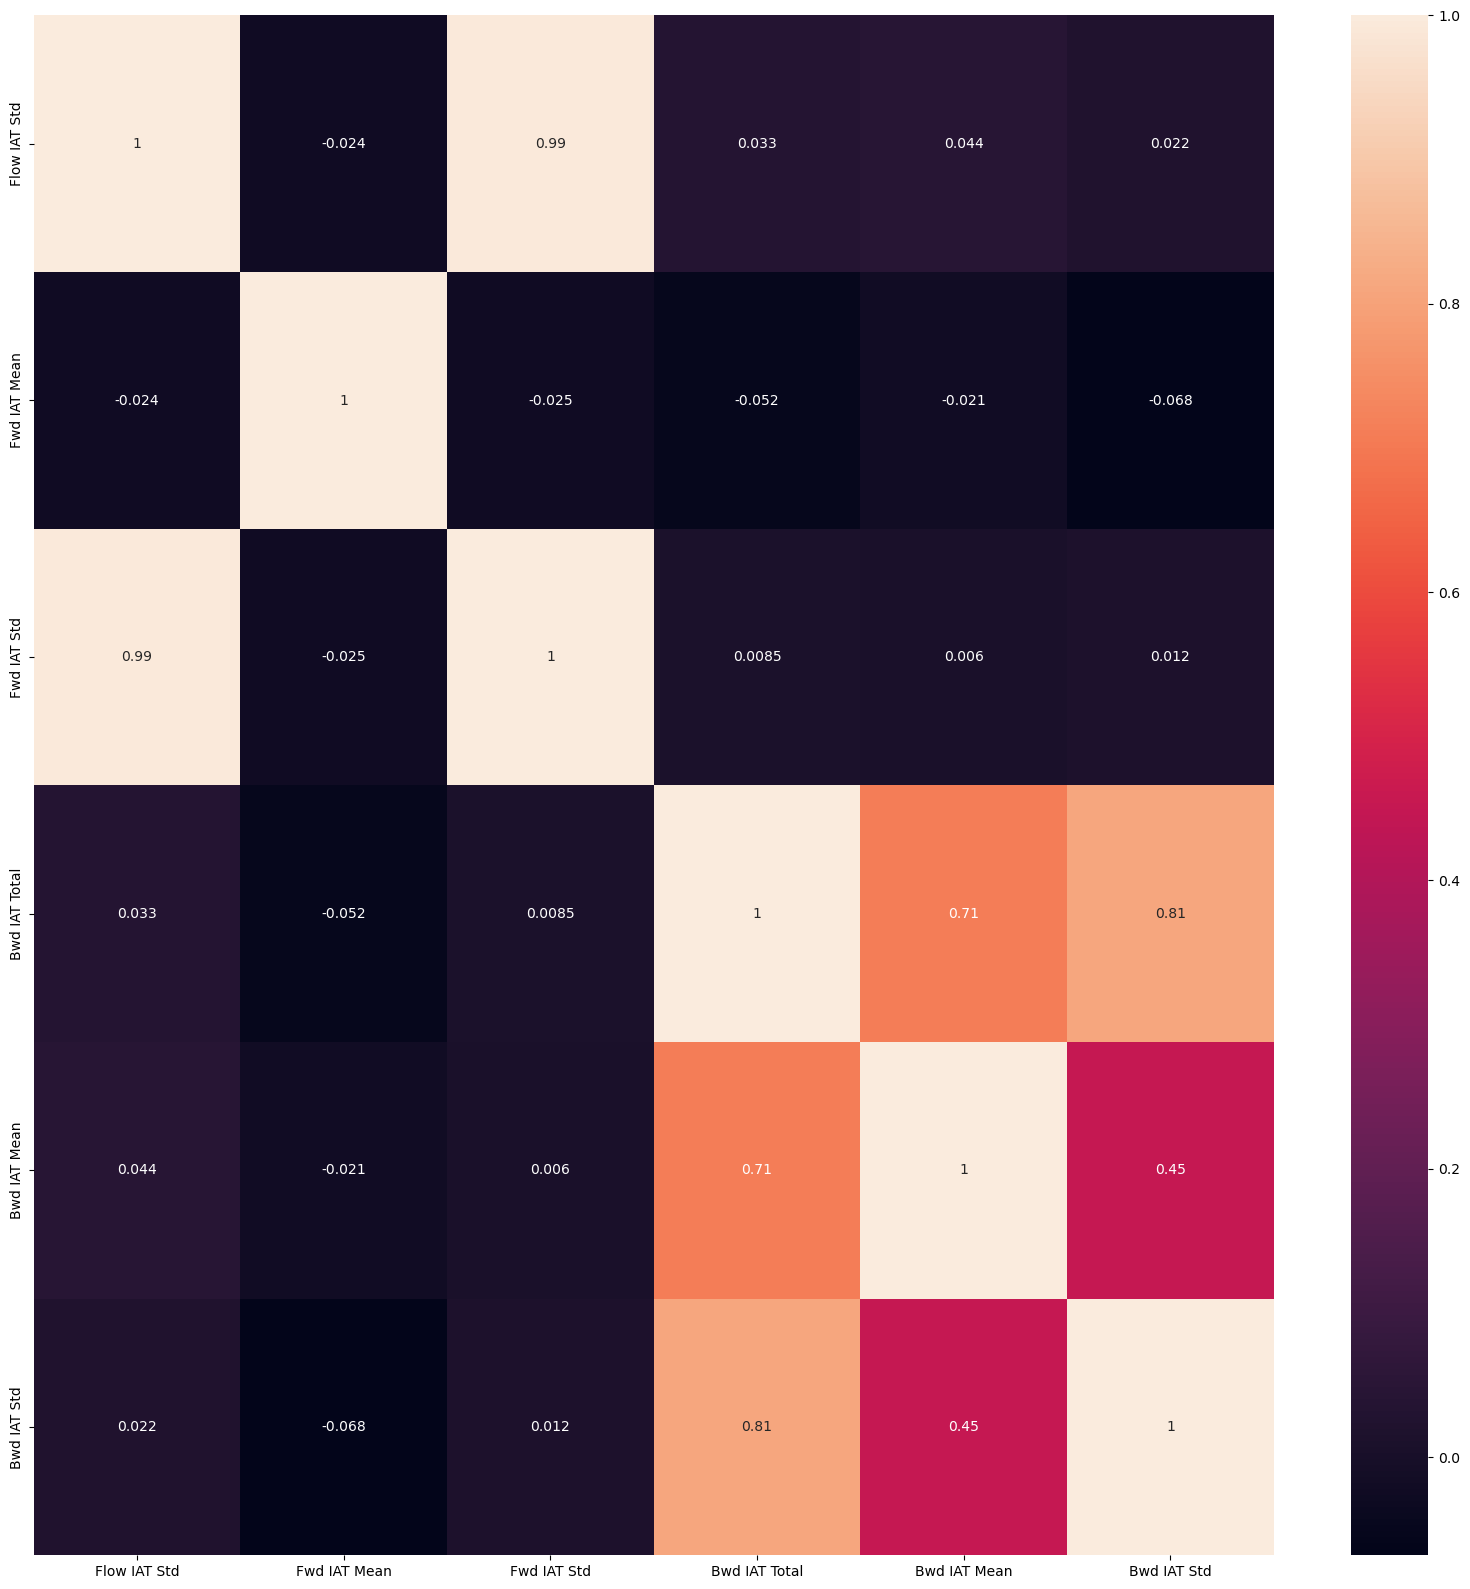

In [439]:
Feb6_IAT= Feb6_IAT.drop(columns=['Bwd IAT Max', 'Bwd IAT Min', 'Flow IAT Mean','Flow IAT Max','Flow IAT Min','Fwd IAT Total','Fwd IAT Max', 'Fwd IAT Min'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_IAT.corr(),annot=True)

In [440]:
Feb6_IAT= Feb6_IAT.drop(columns=['Flow IAT Std'])
IAT_cols = Feb6_IAT.columns.to_list()

<Axes: >

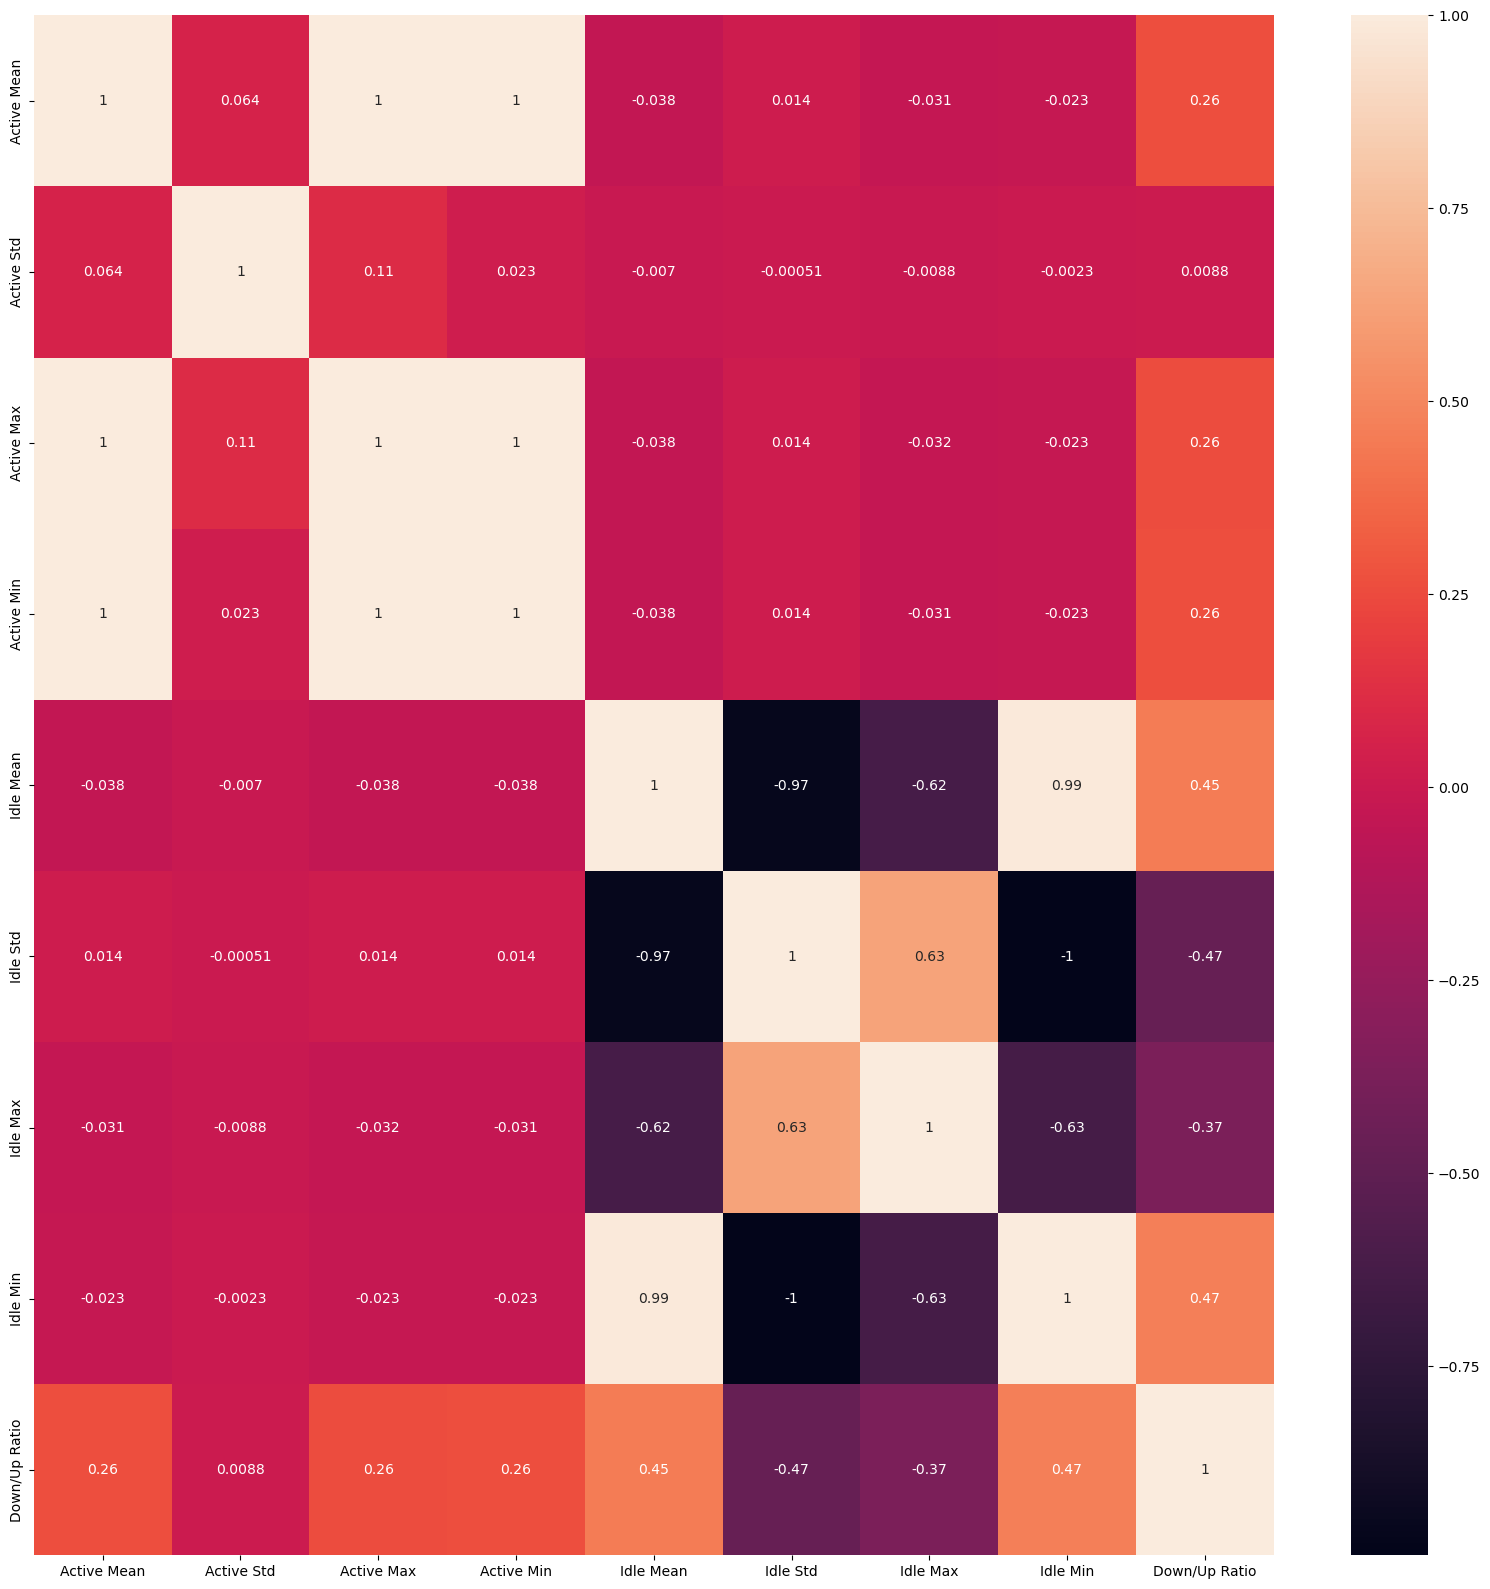

In [450]:
Feb6_activity = Feb6[['Active Mean',
                    'Active Std','Active Max','Active Min',
                    'Idle Mean',
                    'Idle Std',
                    'Idle Max',
                    'Idle Min',
                    'Down/Up Ratio']]
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_activity.corr(),annot=True)

Column to keep: 'Idle Min' - Reason: 99% correlation with 2 columns
Resulting Column dropped: 'Idle Std', 'Idle Mean'

<Axes: >

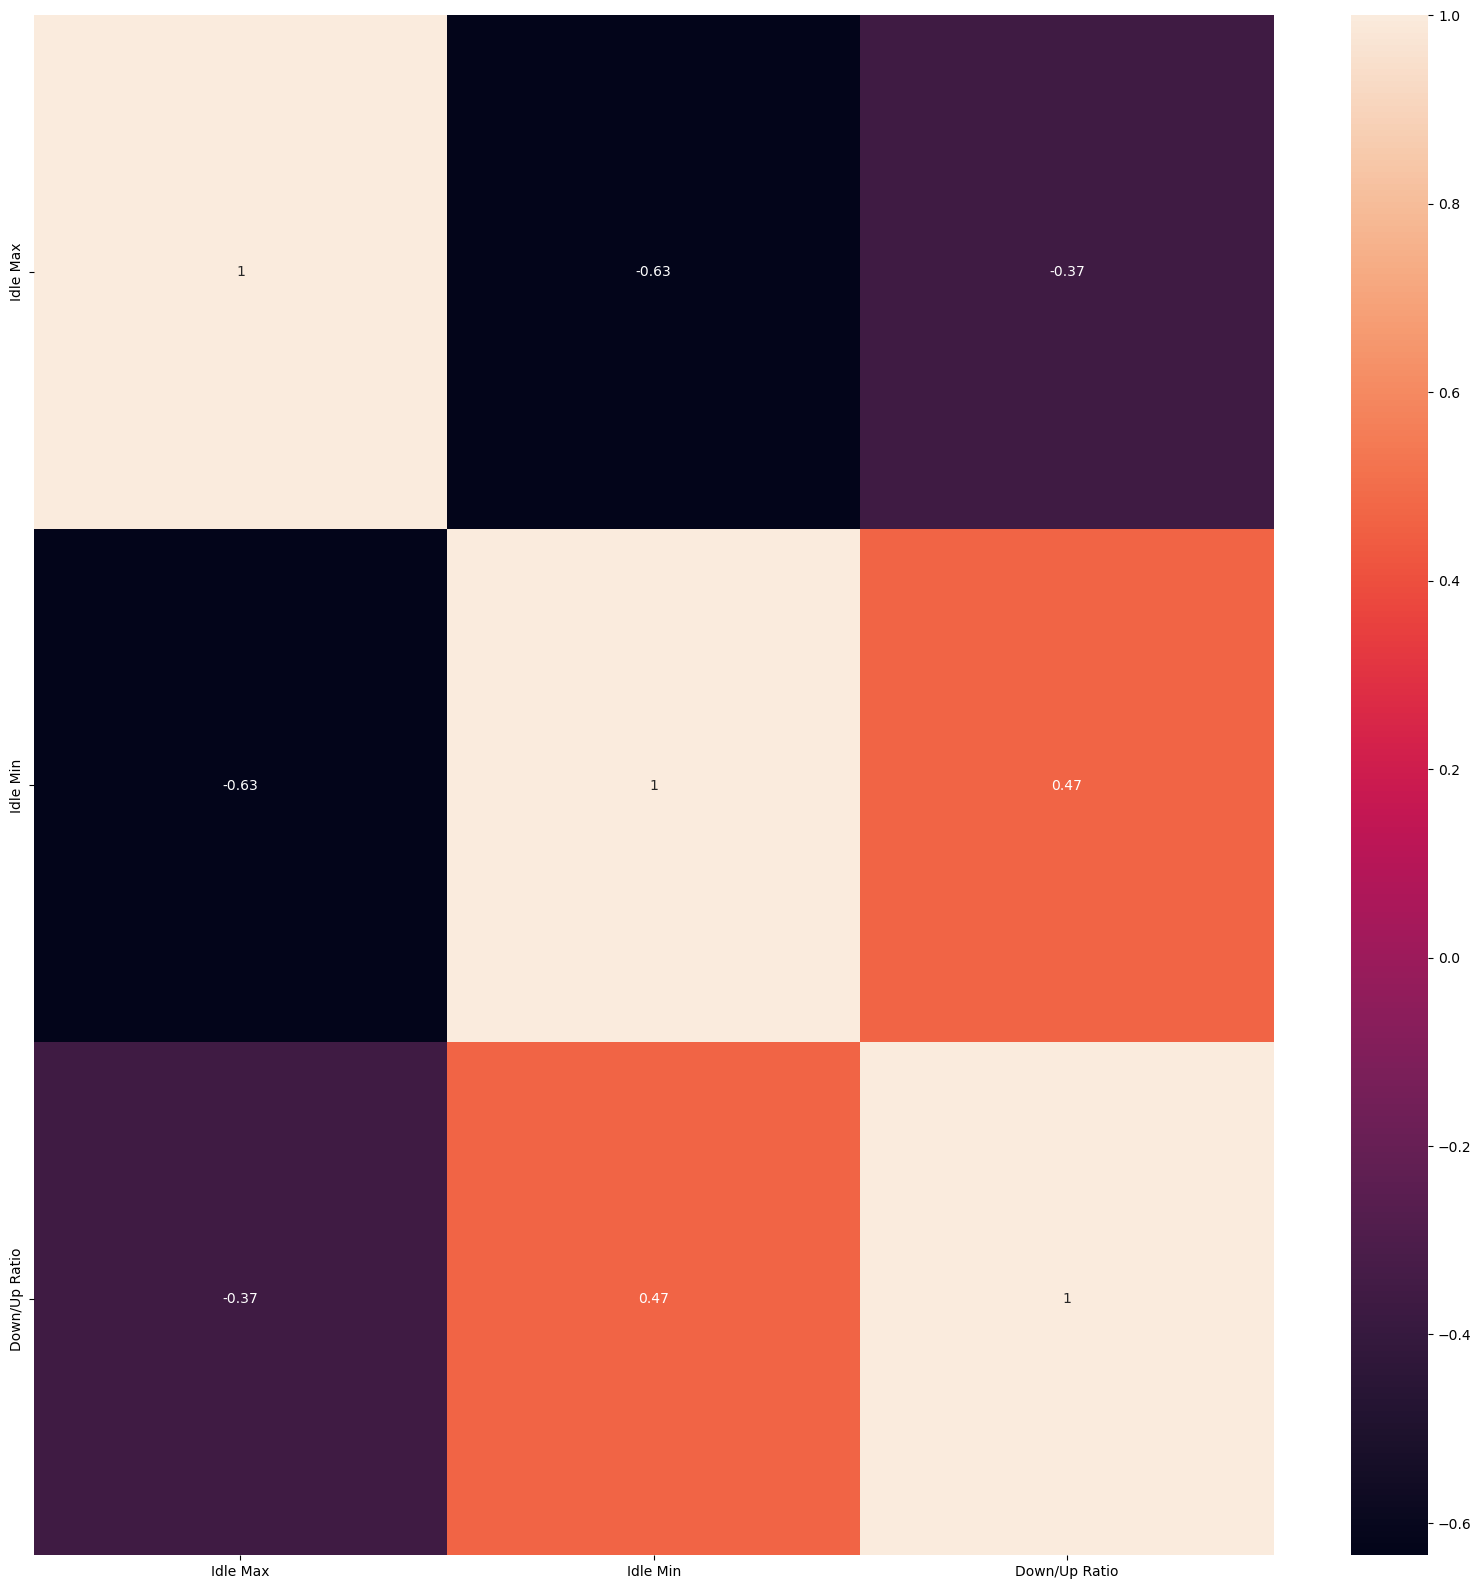

In [442]:
Feb6_activity= Feb6_activity.drop(columns=['Idle Std', 'Idle Mean'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_activity.corr(),annot=True)

In [443]:
act_cols = Feb6_activity.columns.to_list()

## IAT + Activity + Flags

<Axes: >

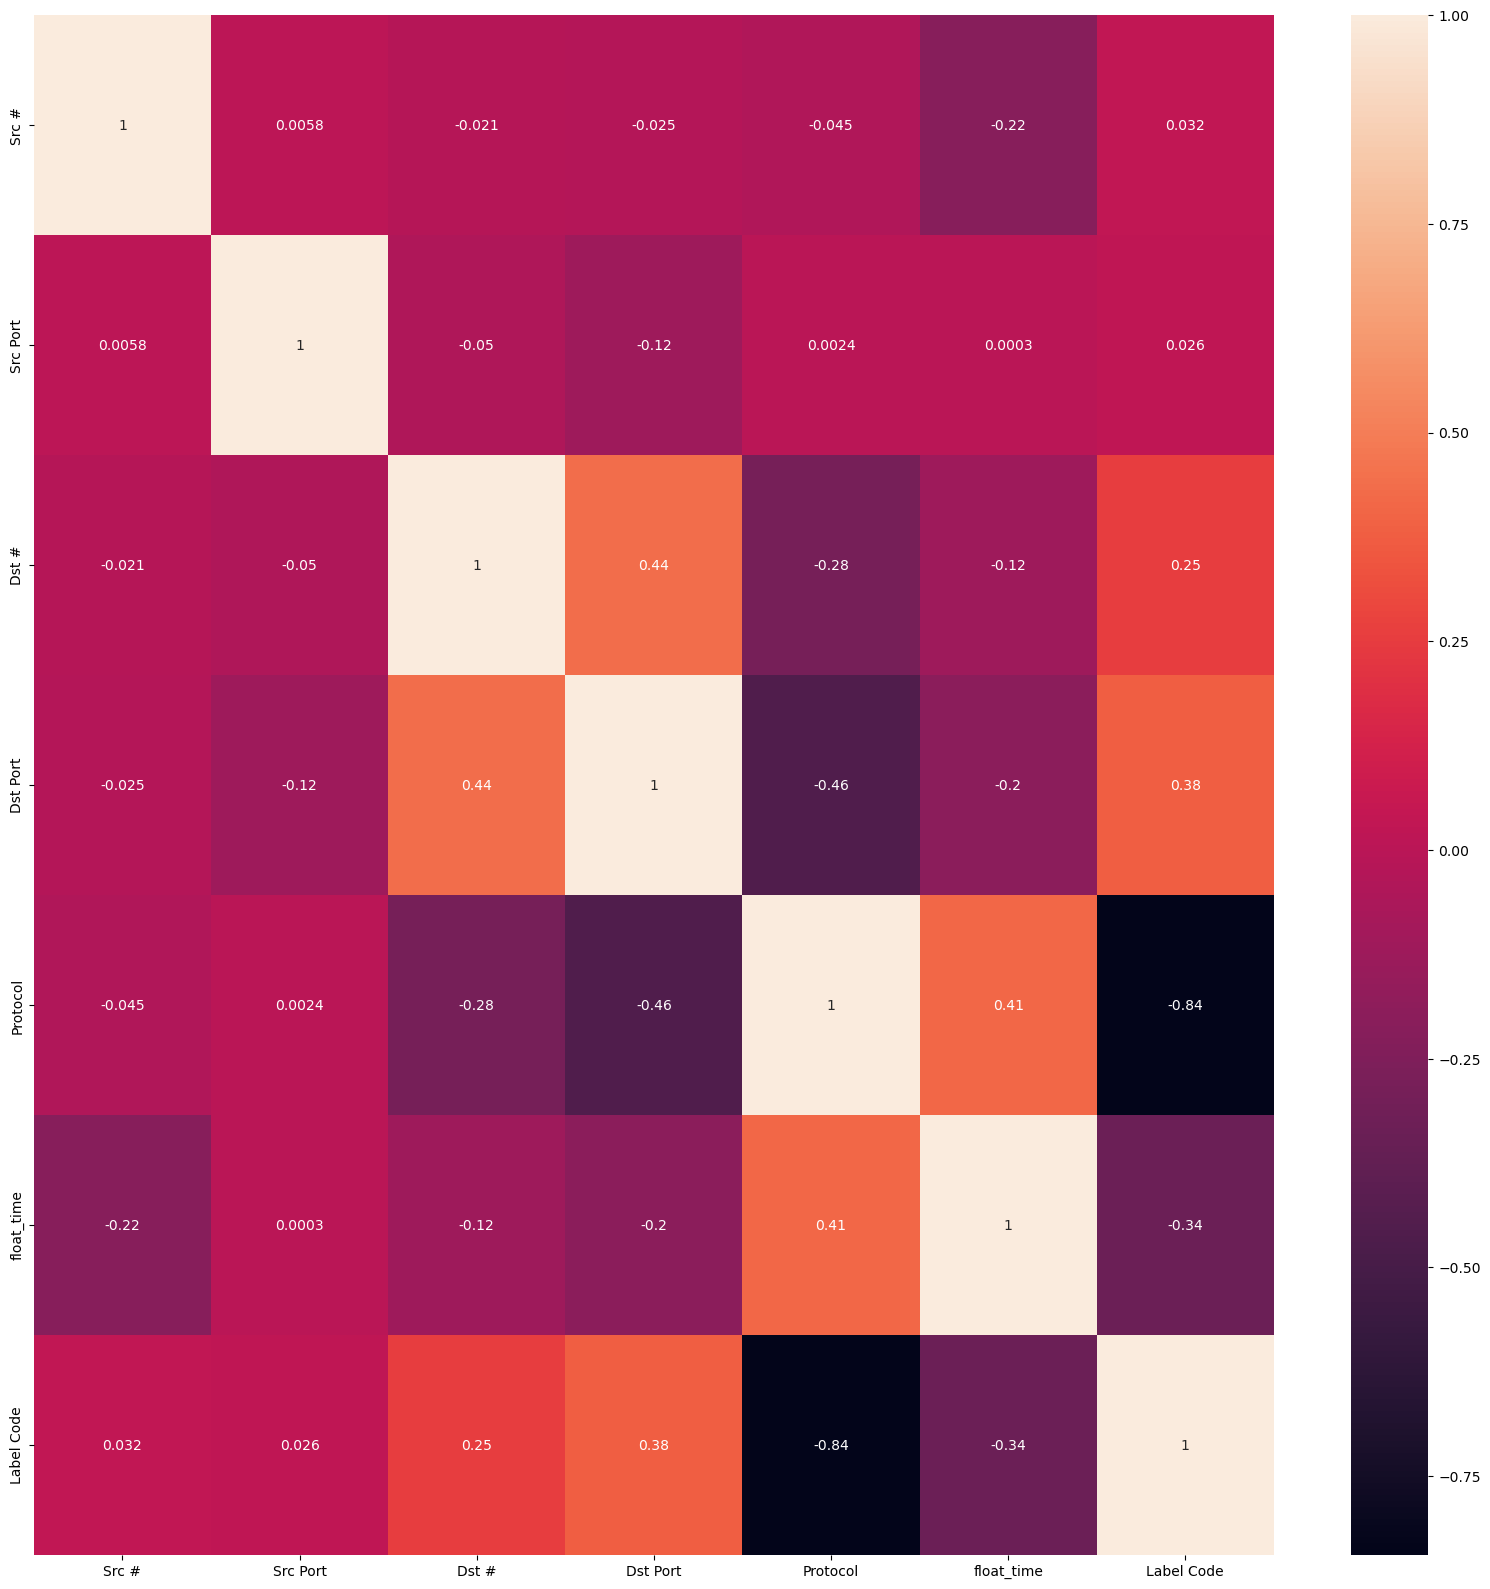

In [444]:
Feb6['Label Code'] = Feb6['Label'].map({'ddospot':1,'cowrie':2,'adbhoney':3,'log4pot':4,'ciscoasa':5,'elasticpot':6,'mailoney':7})
# Convert to datetime
times = pd.to_datetime(Feb6['Timestamp'])
# Extract time and convert to float (hours)
Feb6['float_time'] = times.dt.hour + times.dt.minute / 60 + times.dt.second / 3600
#convert IPs into ints
Feb6['Src #'] = Feb6['Src IP'].str.replace('.', '', regex=False).astype(int)
Feb6['Dst #'] = Feb6['Dst IP'].str.replace('.', '', regex=False).astype(int)
#create frame
Feb6_misc = Feb6[['Src #',
'Src Port',
'Dst #',
'Dst Port',
'Protocol',
'float_time',
'Label Code']]
plt.figure(figsize=(20,20))
sns.heatmap(Feb6_misc.corr(), annot=True)

<Axes: >

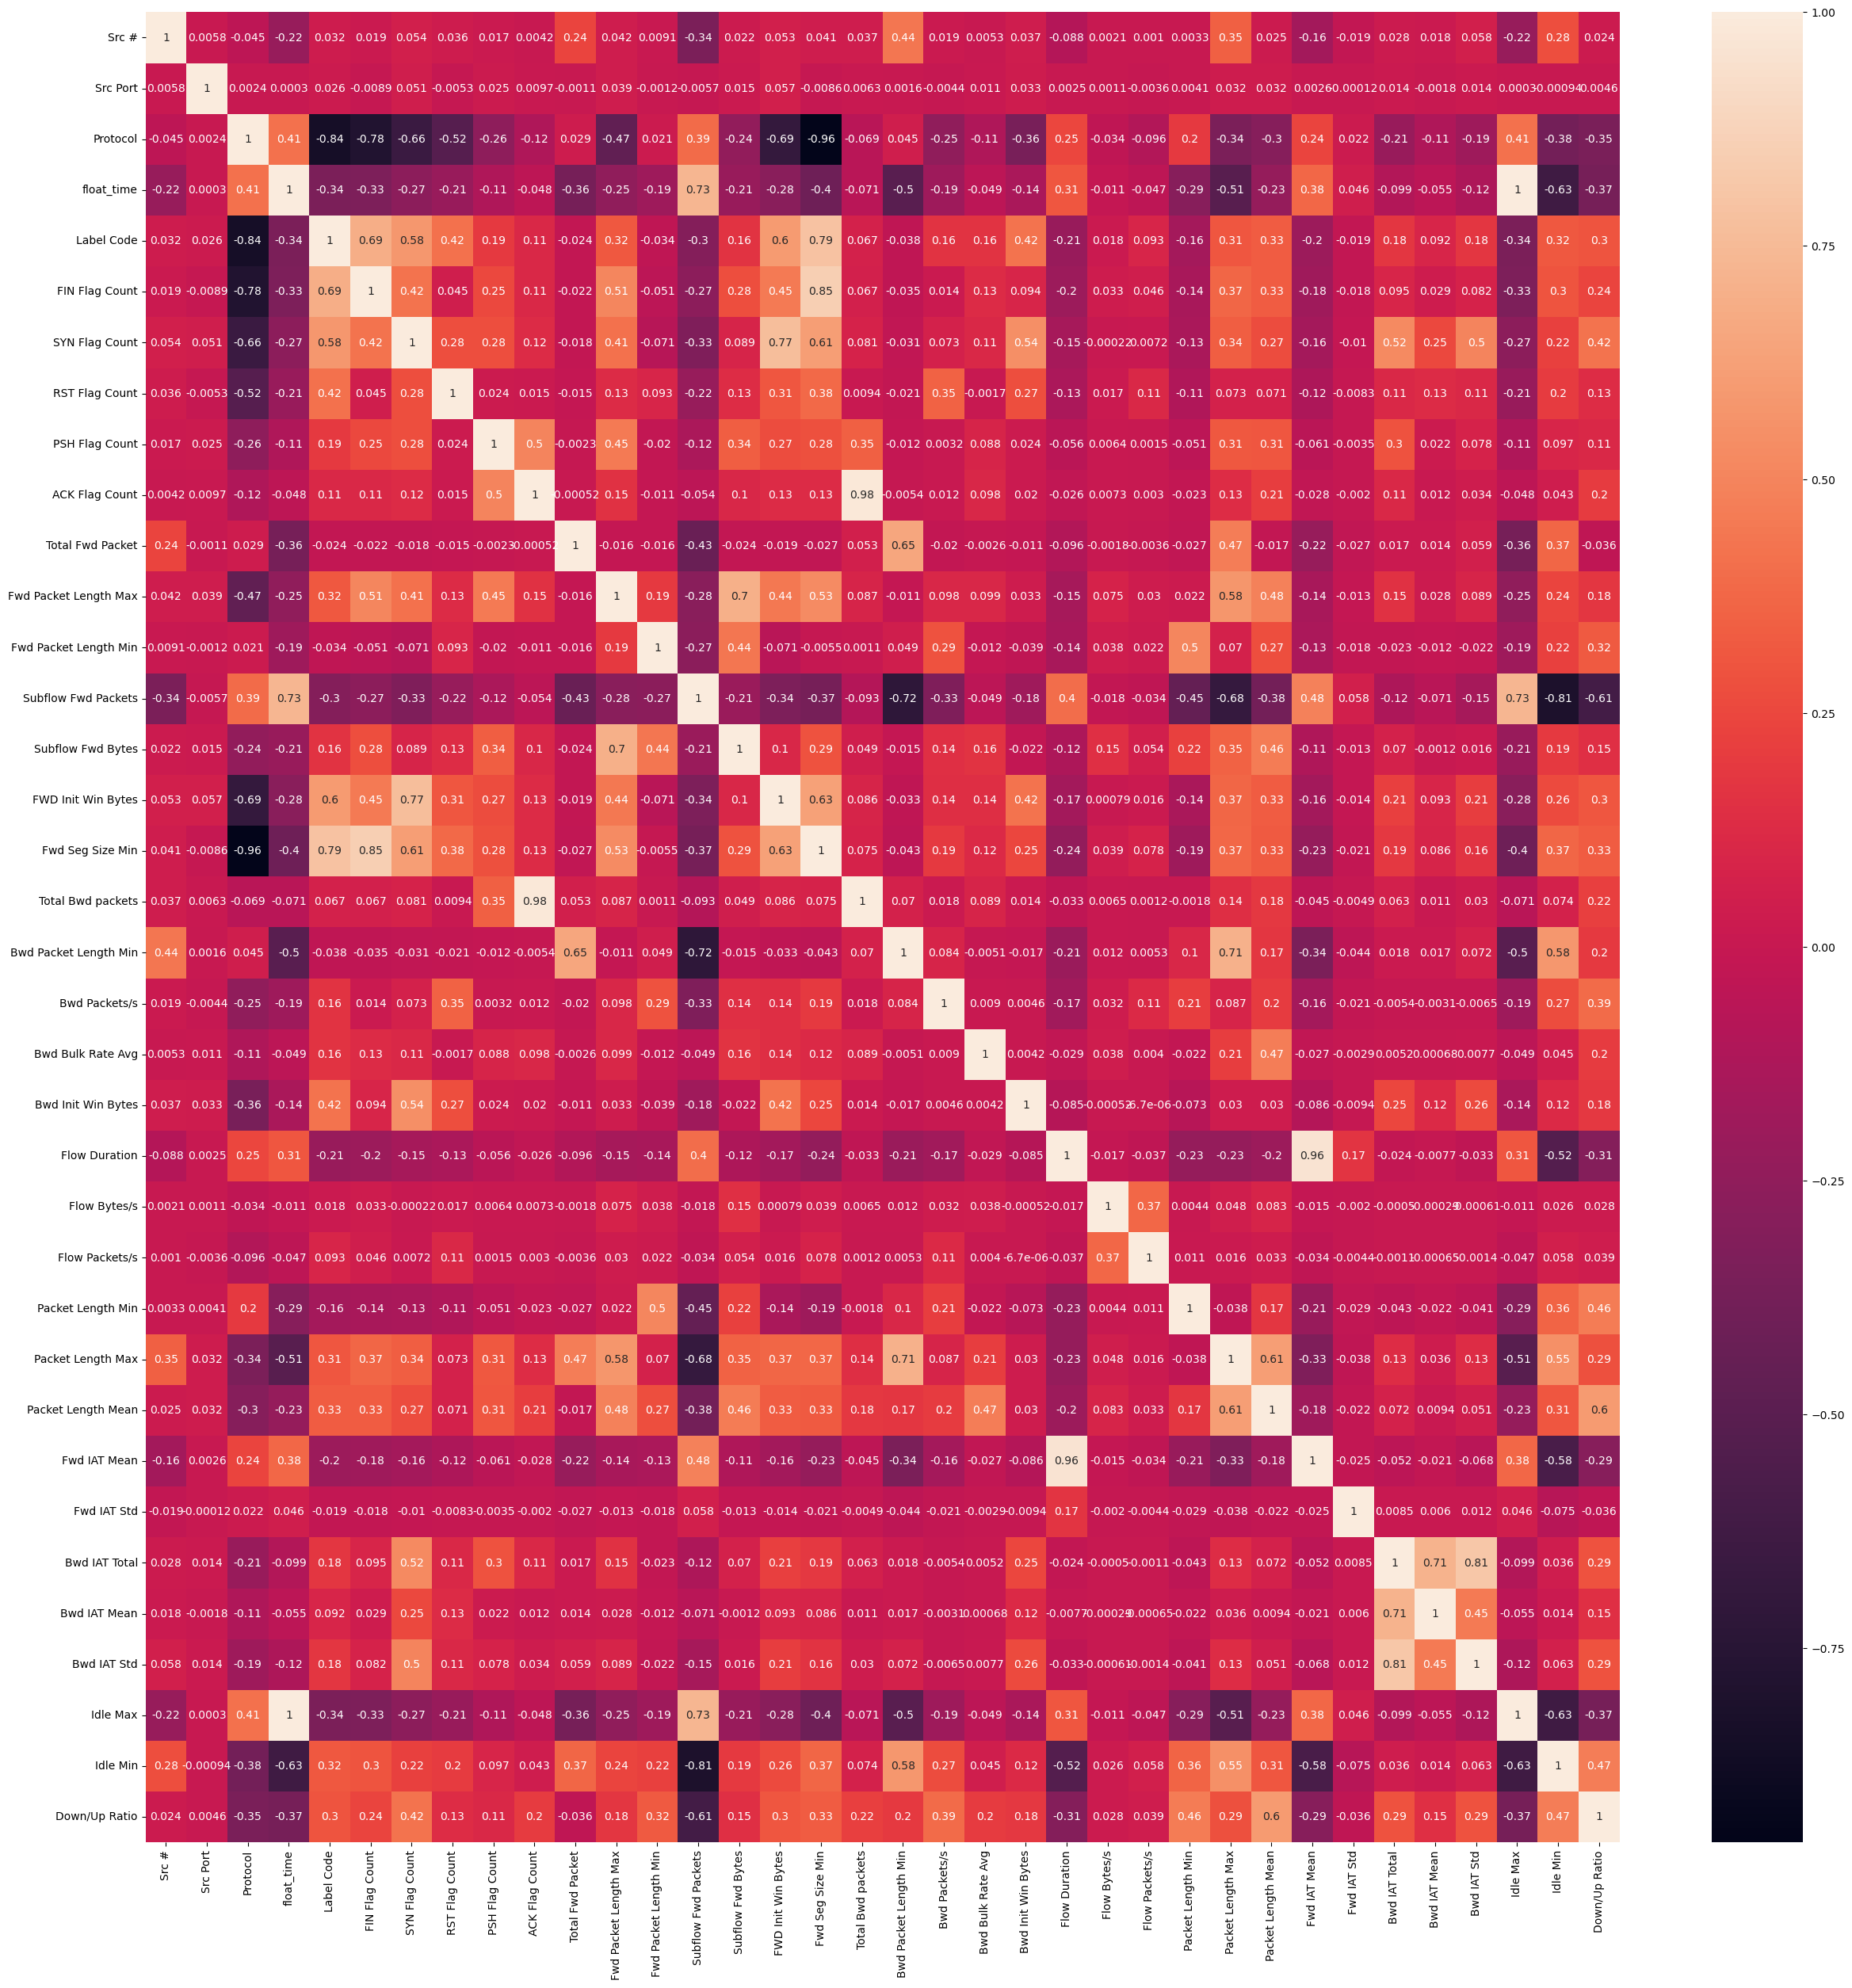

In [445]:
Feb6_misc = Feb6_misc.drop(columns=['Dst #', 'Dst Port'])
misc_cols = Feb6_misc.columns.to_list()
Feb6_misc['Label'] = Feb6['Label']
Feb6_misc['Src IP'] = Feb6['Src IP']
kept_cols = misc_cols + flag_cols + Fwd_Bwd_cols + IAT_cols + act_cols
Feb6_cut = Feb6[kept_cols]
plt.figure(figsize=(30,30))
sns.heatmap(Feb6_cut.corr(),annot=True)

<Axes: xlabel='Idle Max', ylabel='float_time'>

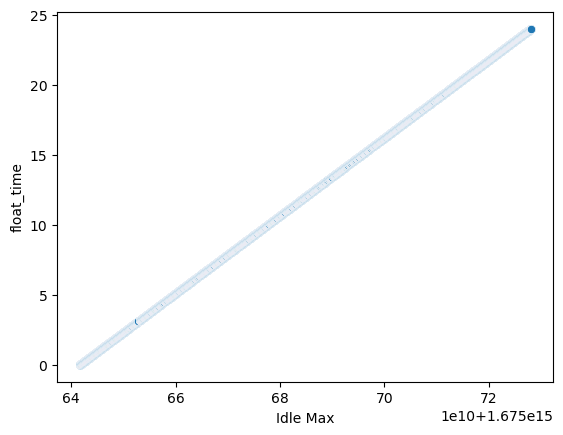

In [446]:
sns.scatterplot(Feb6_cut, x='Idle Max', y='float_time')

<Axes: >

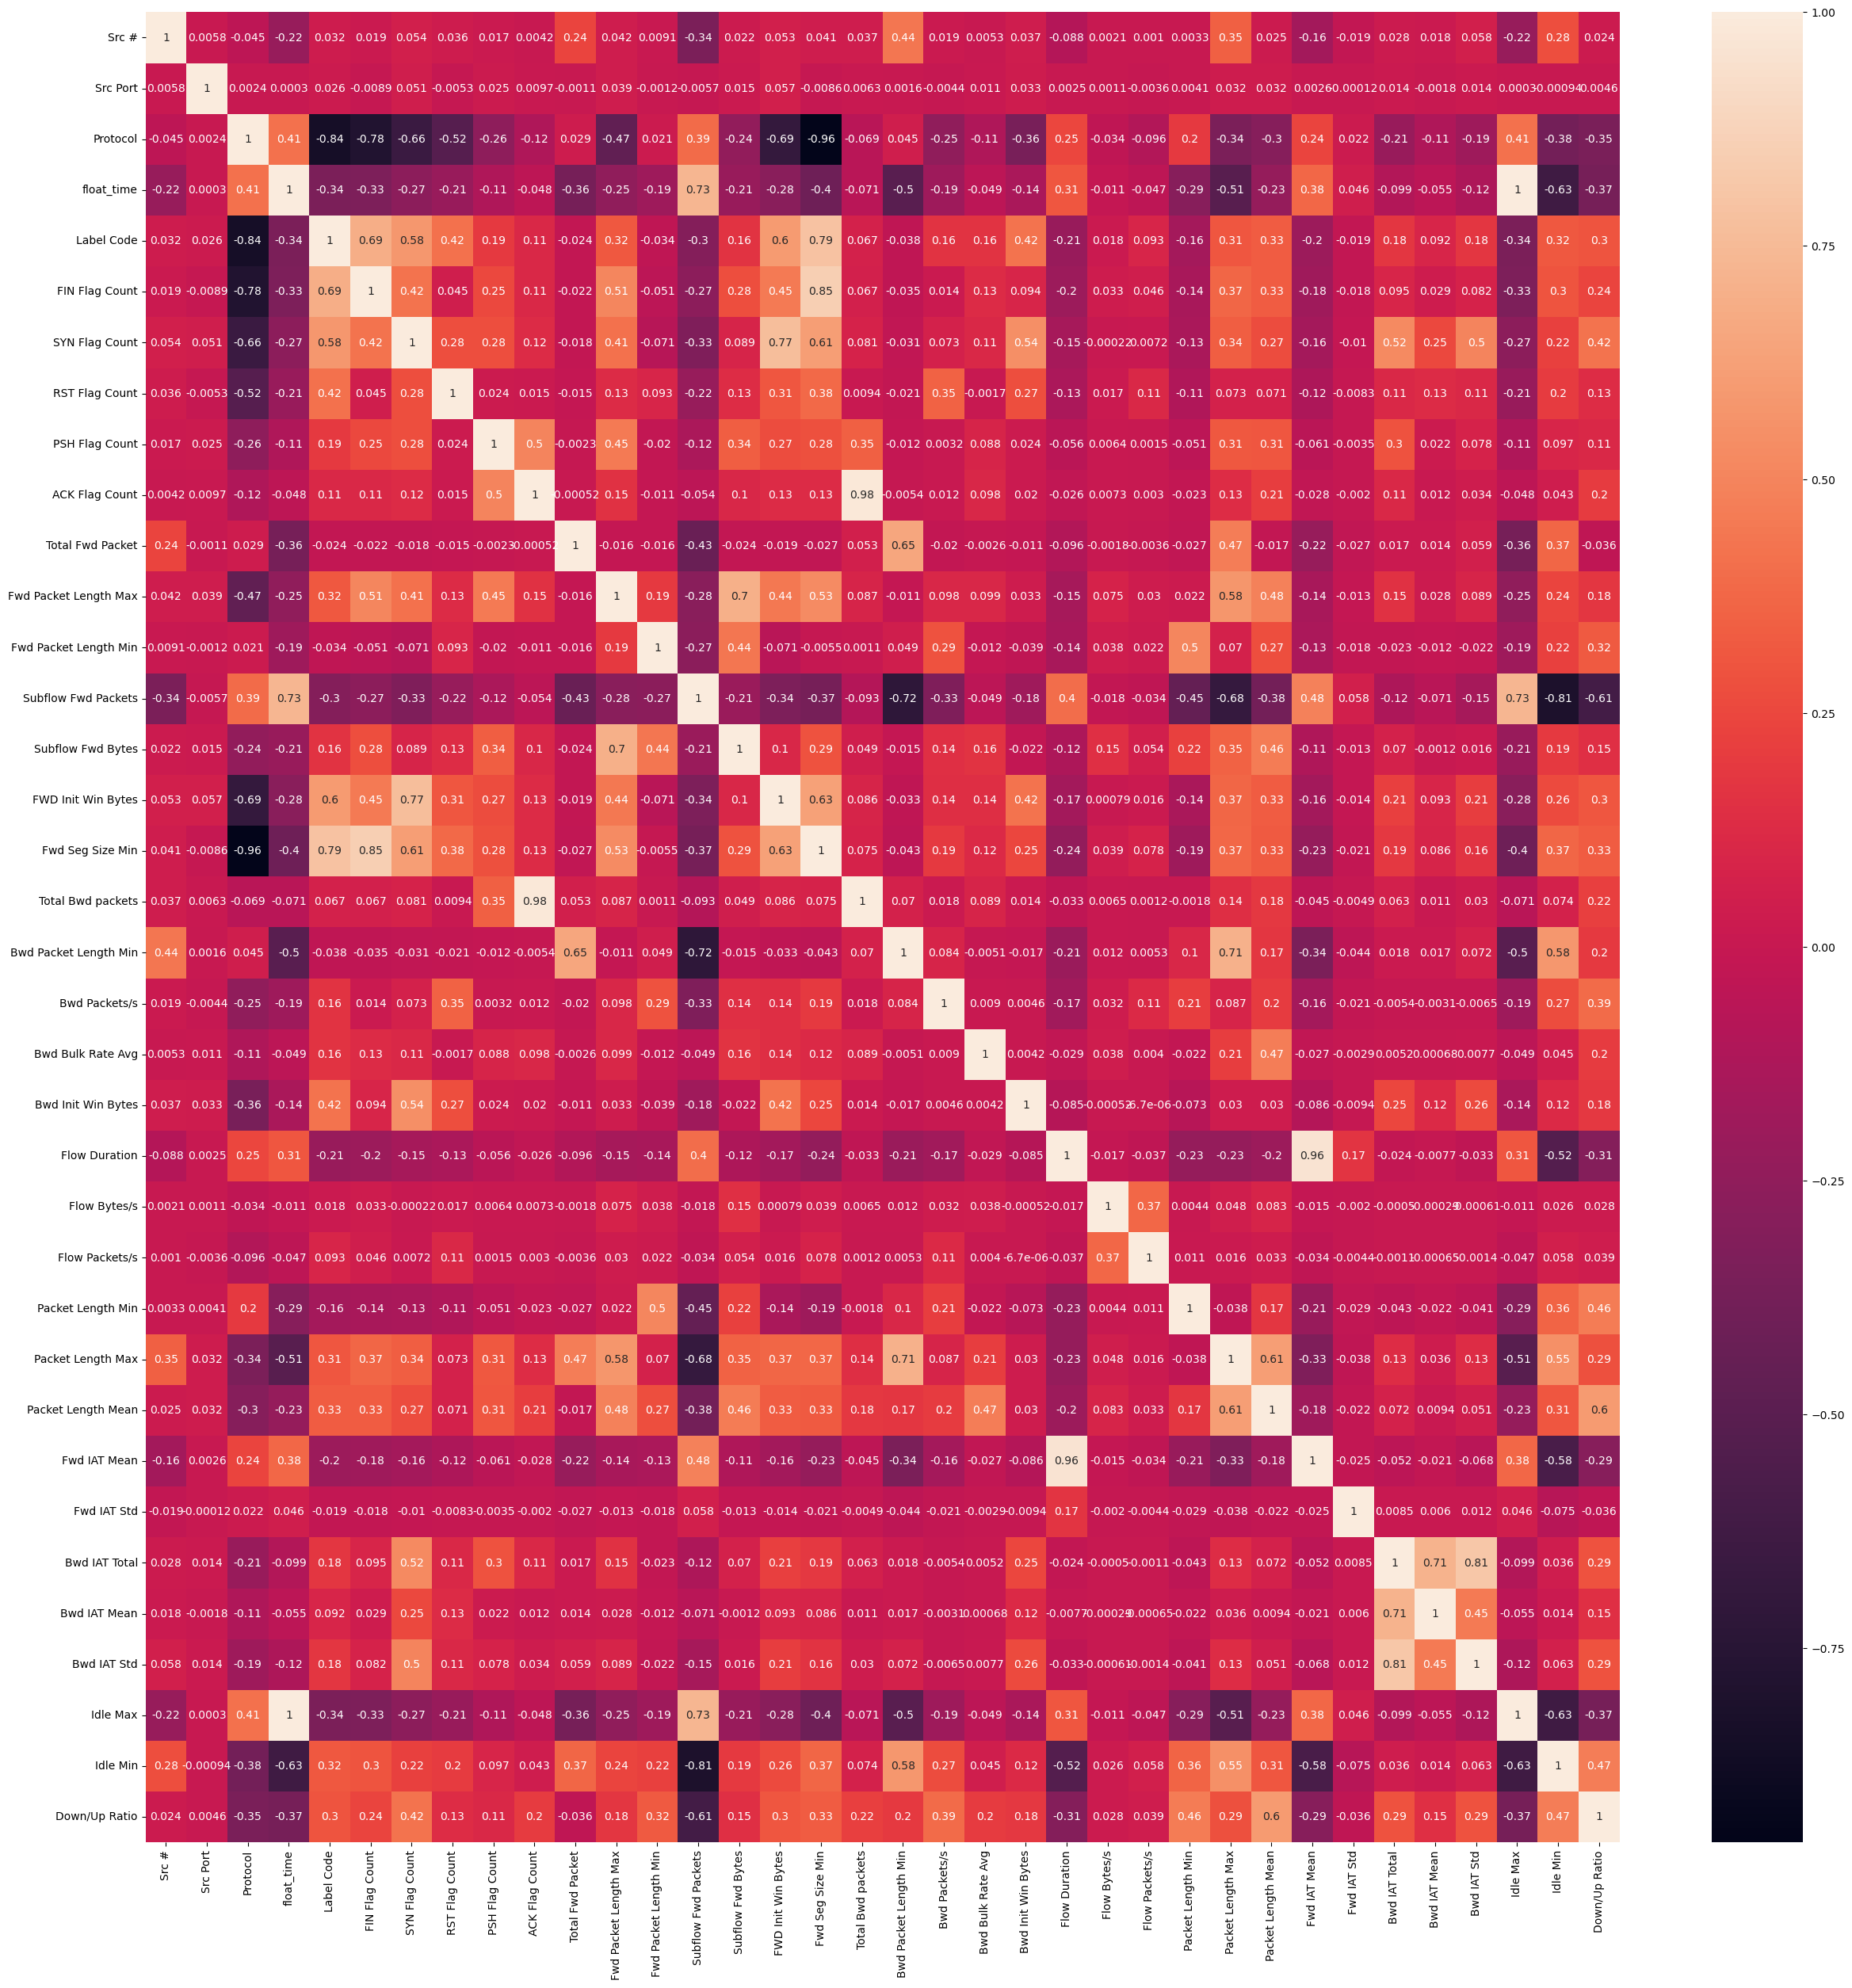

In [447]:

plt.figure(figsize=(30,30))
sns.heatmap(Feb6_cut.corr(), annot=True)

In [448]:
final = Feb6_cut.columns.to_list()


In [449]:
reader = geoip2.database.Reader('/Users/sa12/Documents/Repositories/The-CyberChase/CybercrimeData/GeoLite2-City.mmdb')
# Build location info
locations_2 = []

for ip in Feb6['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"

        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"

    locations_2.append(location_str)

# Add to DataFrame
Feb6['Location'] = locations_2